<a href="https://colab.research.google.com/github/Umariqbal777/MACHINE-LEARNING-MODEL-FOR-UNCONCIOUS-BEHAVIOUR/blob/main/pest%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json

✅ Kaggle API key configured successfully!

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 99% 650M/658M [00:07<00:00, 161MB/s]
100% 658M/658M [00:07<00:00, 86.7MB/s]
✅ Dataset downloaded and unzipped to: ./PlantVillage

Loading and splitting the dataset...
Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.

Detected Classes:
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

Displaying sample augmented images from the training data...


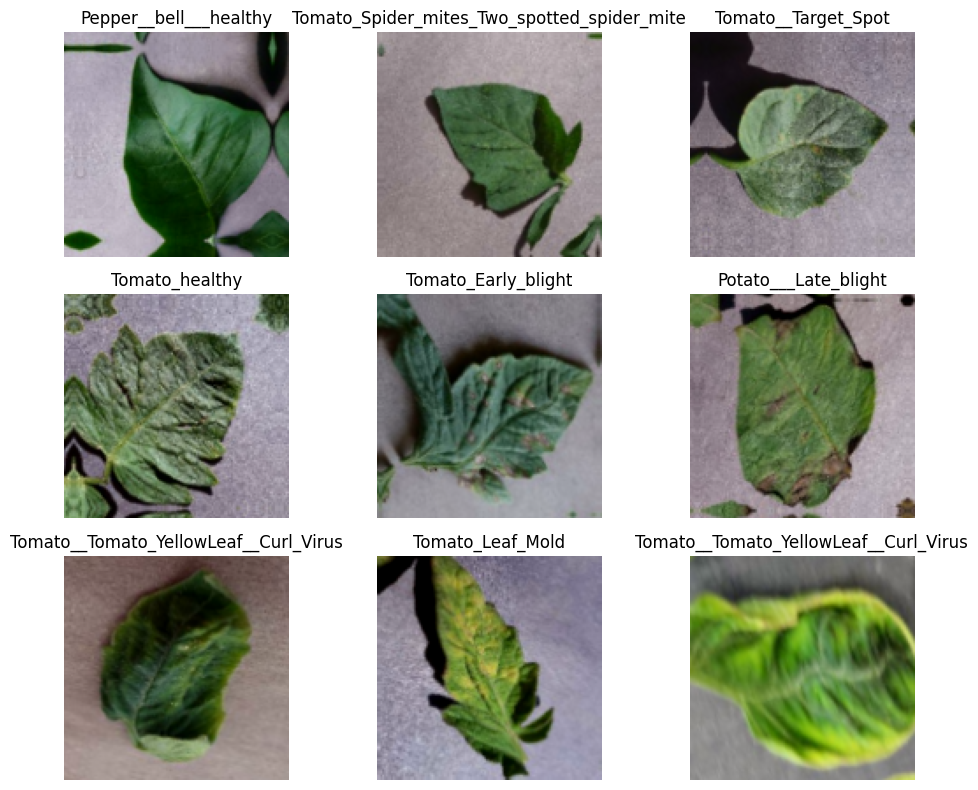


✅ Data preprocessing completed successfully!
The 'train_ds' and 'val_ds' objects are now ready to be passed to model.fit()


In [ ]:
# ============================================================
#  AI-Based Crop Disease Detection - Data Preprocessing Script
#  (Updated with Modern TensorFlow/Keras API)
# ============================================================

# --------------------------------------------------------------------
# Step 1: Install Libraries & Setup Kaggle API
# --------------------------------------------------------------------
!pip install -q kaggle
!pip install tensorflow numpy matplotlib

from google.colab import files
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("Please upload your kaggle.json file")
uploaded = files.upload()

if 'kaggle.json' in uploaded:
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("\n✅ Kaggle API key configured successfully!")
else:
    print("\n⚠️ kaggle.json not found. Please upload the file.")

# --------------------------------------------------------------------
# Step 2: Download and Unzip the Dataset
# --------------------------------------------------------------------
KAGGLE_DATASET = 'emmarex/plantdisease'

print(f"\nDownloading dataset: {KAGGLE_DATASET}...")
!kaggle datasets download -d {KAGGLE_DATASET} -p ./ --unzip

DATASET_PATH = "./PlantVillage"
print(f"✅ Dataset downloaded and unzipped to: {DATASET_PATH}")

# --------------------------------------------------------------------
# Step 3: Define Image Parameters
# --------------------------------------------------------------------
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

# --------------------------------------------------------------------
# Step 4: Load Data Using the Modern API
# --------------------------------------------------------------------
# MODIFIED: Replaced the old ImageDataGenerator with this more efficient method.
print("\nLoading and splitting the dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# --------------------------------------------------------------------
# Step 5: Verify Class Labels
# --------------------------------------------------------------------
class_names = train_ds.class_names
print("\nDetected Classes:")
print(class_names)

# --------------------------------------------------------------------
# Step 6: Define Augmentation and Rescaling Layers
# --------------------------------------------------------------------
# NEW: Augmentation is now done with dedicated layers.
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
])

rescaling_layer = tf.keras.layers.Rescaling(1./255)

# --------------------------------------------------------------------
# Step 7: Preview Sample Images
# --------------------------------------------------------------------
# MODIFIED: The preview function is updated to work with the new tf.data.Dataset format.
def show_sample_images(dataset):
    plt.figure(figsize=(10, 8))
    # Get one batch from the dataset
    for images, labels in dataset.take(1):
        # Apply rescaling and augmentation to the batch for visualization
        rescaled_images = rescaling_layer(images)
        augmented_images = data_augmentation(rescaled_images)

        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            # Display the augmented image
            plt.imshow(augmented_images[i])
            # The label is an integer, so we use it as an index
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.tight_layout()
    plt.show()

print("\nDisplaying sample augmented images from the training data...")
show_sample_images(train_ds)

# --------------------------------------------------------------------
# Step 8: Configure Dataset for Performance
# --------------------------------------------------------------------
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\n✅ Data preprocessing completed successfully!")
print("The 'train_ds' and 'val_ds' objects are now ready to be passed to model.fit()")

🔄 Loading dataset...
Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.

✅ Detected 15 classes:
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3744 - loss: 2.5556
Epoch 1: val_accuracy improved from -inf to 0.26775, saving model to model/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 962s 2s/step - accuracy: 0.3745 - loss: 2.5545 - val_accuracy: 0.2677 - val_loss: 3.2432
Epoch 2/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5263 - loss: 1.5116
Epoch 2: val_accuracy did not improve from 0.26775
516/516 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.5263 - loss: 1.5115 - val_accuracy: 0.2445 - val_loss: 14.9066
Epoch 3/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5832 - loss: 1.2971
Epoch 3: val_accuracy improved from 0.26775 to 0.54761, saving model to model/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 923s 2s/step - accuracy: 0.5833 - loss: 1.2969 - val_accuracy: 0.5476 - val_loss: 1.5695
Epoch 4/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6378 - loss: 1.1081
Epoch 4: val_accuracy improved from 0.54761 to 0.71844, saving mode

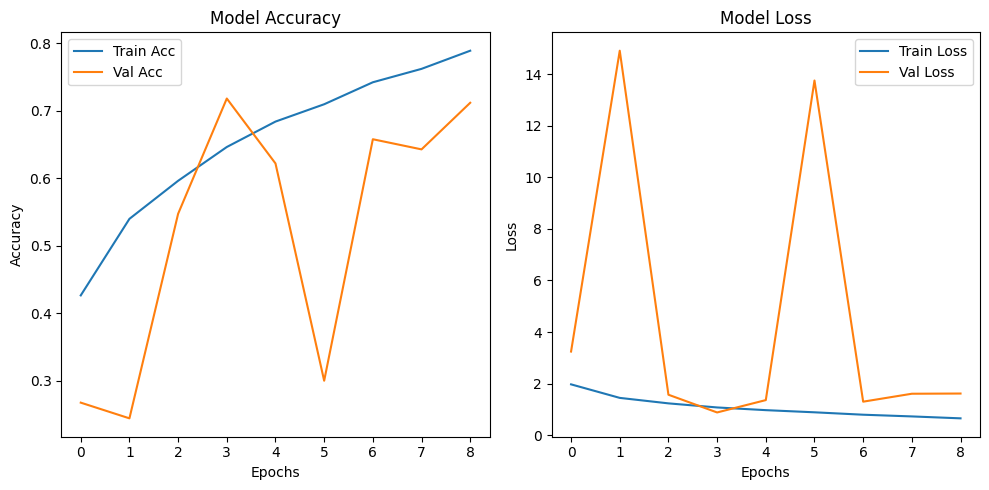


✅ Training complete!
Best model saved at: model/best_model.keras


In [ ]:
# ============================================================
#  AI-Based Crop Disease Detection - Model Training Script
#  (Compatible with TF 2.15+ and modern tf.data pipeline)
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# ============================================================
# 1️⃣ Load Preprocessed Dataset
# ============================================================
# ⚠️ Ensure you have run the preprocessing notebook before this step.
DATASET_PATH = "./PlantVillage"
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

print("🔄 Loading dataset...")

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)
print(f"\n✅ Detected {num_classes} classes:")
print(class_names)

# ============================================================
# 2️⃣ Dataset Optimization
# ============================================================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ============================================================
# 3️⃣ Data Augmentation & Normalization
# ============================================================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

normalization_layer = layers.Rescaling(1./255)

# ============================================================
# 4️⃣ Define CNN Model
# ============================================================
def build_model(input_shape=(128, 128, 3), num_classes=9):
    model = models.Sequential([
        data_augmentation,
        normalization_layer,

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),
        layers.BatchNormalization(),

        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model(input_shape=(128,128,3), num_classes=num_classes)
model.summary()

# ============================================================
# 5️⃣ Callbacks (Checkpoint & EarlyStopping)
# ============================================================
os.makedirs("model", exist_ok=True)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "model/best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# ============================================================
# 6️⃣ Train the Model
# ============================================================
EPOCHS = 25

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[checkpoint_cb, earlystop_cb]
)

# ============================================================
# 7️⃣ Visualize Training Performance
# ============================================================
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ============================================================
# 8️⃣ Save Final Model
# ============================================================
model.save("model/final_model.keras")
print("\n✅ Training complete!")
print("Best model saved at: model/best_model.keras")


Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.

✅ Classes detected (15):
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
129/129 ━━━━━━━━━━━━━━━━━━━━ 51s 392ms/step - accuracy: 0.9117 - loss: 0.2826

📈 Validation Accuracy: 91.25%
129/129 ━━━━━━━━━━━━━━━━━━━━ 44s 337ms/step

📊 Classification Report:

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.05      0.04      0.05       200
                     Pepper__bell___healthy       0.07      0.08

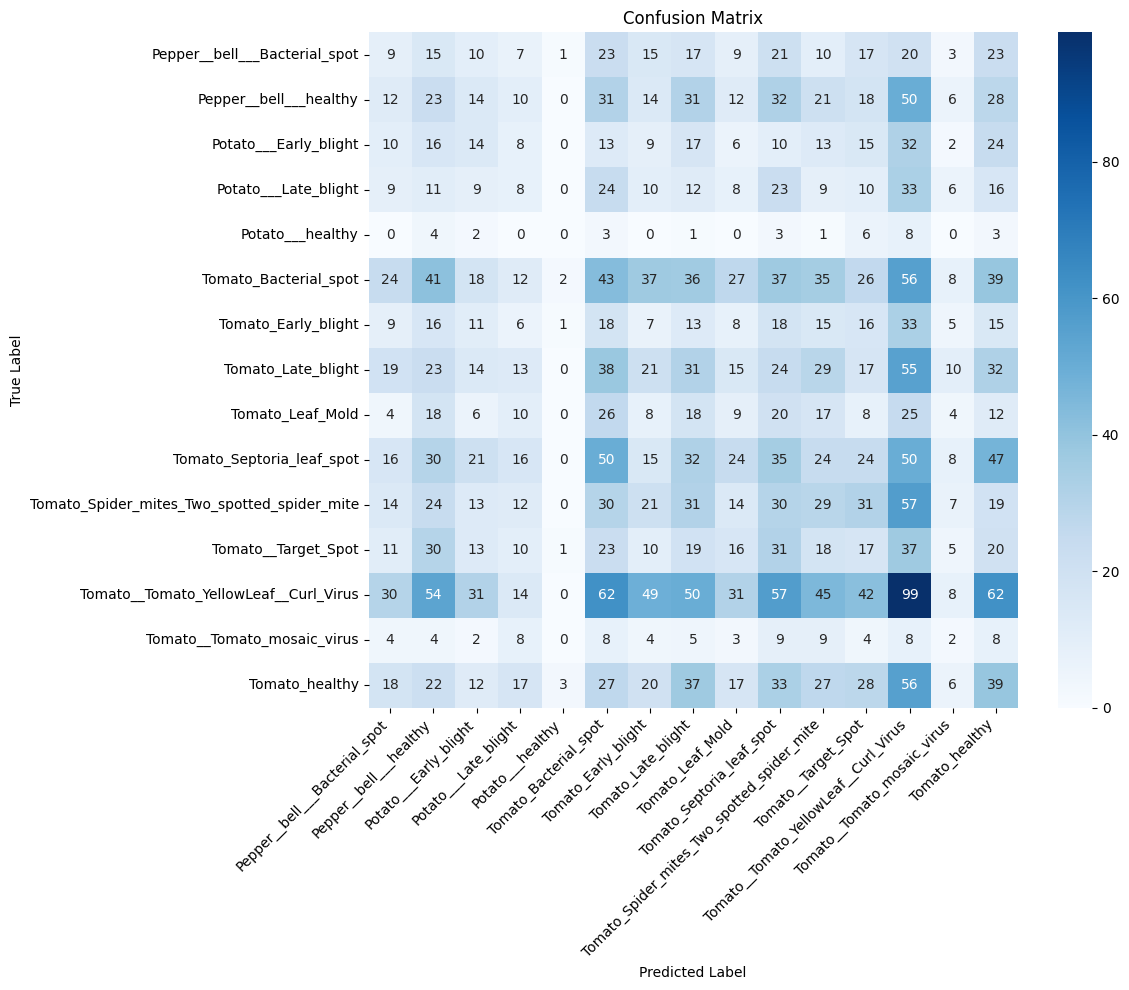

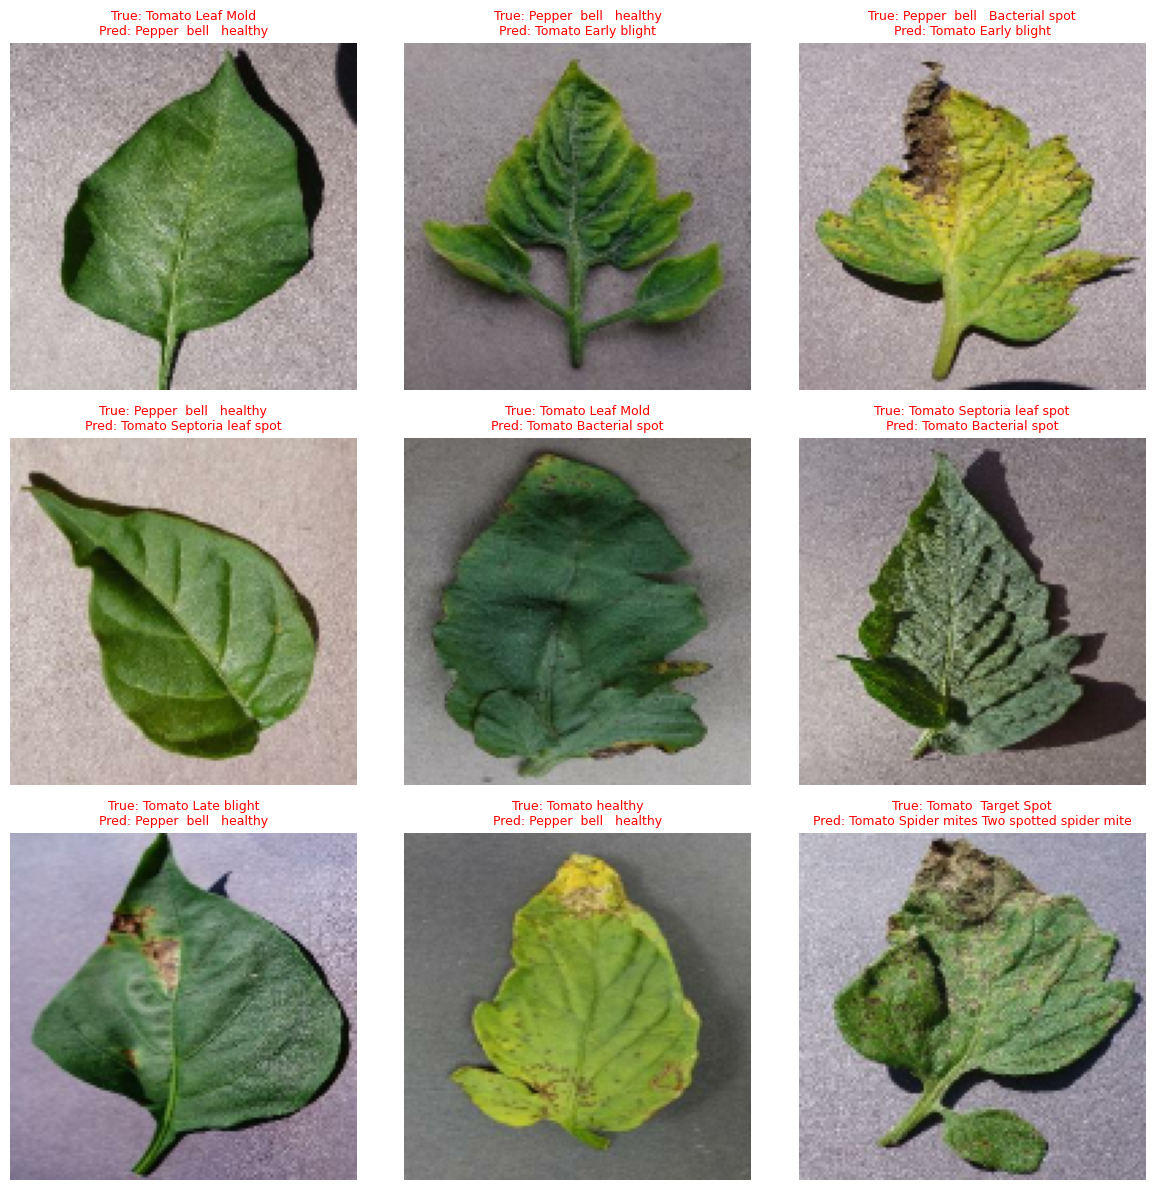

In [ ]:
# ==========================================================
# AI-Based Crop Disease Detection - Evaluation Script
# For use with models saved in .h5 format
# ==========================================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os

# ==========================================================
# 1️⃣ Load Trained Model
# ==========================================================
# MODIFIED: Changed the model path to point to your .h5 file
MODEL_PATH = 'best_crop_model.h5'
model = tf.keras.models.load_model(MODEL_PATH)

# ==========================================================
# 2️⃣ Load Validation Dataset
# ==========================================================
DATASET_PATH = "./PlantVillage"
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

# We only need the validation split for evaluation, but creating
# a dummy train_ds is the easiest way to get the class names.
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# ==========================================================
# 3️⃣ Get Class Labels
# ==========================================================
class_labels = train_ds.class_names
num_classes = len(class_labels)
print(f"\n✅ Classes detected ({num_classes}):")
print(class_labels)

# ==========================================================
# 4️⃣ Normalize Validation Dataset for Prediction
# ==========================================================
normalization_layer = tf.keras.layers.Rescaling(1./255)
val_ds_normalized = val_ds.map(lambda x, y: (normalization_layer(x), y))

# ==========================================================
# 5️⃣ Evaluate Model
# ==========================================================
# Note: The model already has rescaling built-in, so we can evaluate on the original val_ds
val_loss, val_acc = model.evaluate(val_ds)
print(f"\n📈 Validation Accuracy: {val_acc*100:.2f}%")

# ==========================================================
# 6️⃣ Predict Classes
# ==========================================================
# We predict on the original val_ds as the model handles rescaling internally
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# ==========================================================
# 7️⃣ Classification Report
# ==========================================================
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# ==========================================================
# 8️⃣ Confusion Matrix
# ==========================================================
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha="right") # Adjust rotation for better visibility
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ==========================================================
# 9️⃣ Optional: Show Misclassified Images
# ==========================================================
def show_misclassified_images(dataset, y_true, y_pred, num_images=9):
    errors = np.where(y_pred != y_true)[0]
    if len(errors) == 0:
        print("🎉 No misclassified images!")
        return

    plt.figure(figsize=(12, 12))
    # We need to unbatch the dataset to get all images
    all_images_normalized = np.concatenate([x for x, y in dataset], axis=0)

    for i, idx in enumerate(errors[:num_images]):
        # The images are already normalized, which is fine for plt.imshow
        img = all_images_normalized[idx]
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        true_label_name = class_labels[y_true[idx]].replace('_', ' ')
        pred_label_name = class_labels[y_pred[idx]].replace('_', ' ')
        plt.title(f"True: {true_label_name}\nPred: {pred_label_name}", fontsize=9, color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show first 9 misclassified images using the normalized dataset
show_misclassified_images(val_ds_normalized, y_true, y_pred)

In [ ]:
# ====================================================================
#  AI-Based Crop Disease Detection - Final Colab Setup & Run Script
# ====================================================================

# --------------------------------------------------------------------
# Part 1: Setup and File Creation
# --------------------------------------------------------------------

# Step 1.1: Install necessary libraries
print("⏳ Installing required libraries...")
# We use pyngrok directly for more stability
!pip install -q pyngrok tensorflow
print("✅ Libraries installed.")

# Step 1.2: Import all dependencies
import os
import numpy as np
import getpass
from flask import Flask, request, render_template
from pyngrok import ngrok  # Use pyngrok directly
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1.3: Ngrok Authentication
# ----------------------------------------------------
# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
print("\n🔑 Please provide your ngrok authtoken.")
print("You can get it from https://dashboard.ngrok.com/get-started/your-authtoken")
authtoken = getpass.getpass()
ngrok.set_auth_token(authtoken)
print("✅ ngrok authtoken configured successfully.")


# Step 1.4: Create necessary folders
os.makedirs('templates', exist_ok=True)
os.makedirs('static/uploads', exist_ok=True)

# Step 1.5: Define HTML content as Python strings
index_html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crop Disease Detection</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
    </style>
</head>
<body class="bg-gray-100 flex items-center justify-center min-h-screen">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-lg w-full text-center">
        <h1 class="text-4xl font-bold text-gray-800 mb-2">Crop Disease Detection</h1>
        <p class="text-gray-600 mb-6">Upload an image of a plant leaf to detect its disease.</p>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <div class="mb-6">
                <label for="file-upload" class="cursor-pointer w-full px-4 py-12 border-2 border-dashed border-gray-300 rounded-lg text-gray-500 hover:border-blue-500 hover:text-blue-600 transition duration-300">
                    <svg class="mx-auto h-12 w-12" stroke="currentColor" fill="none" viewBox="0 0 48 48" aria-hidden="true"><path d="M28 8H12a4 4 0 00-4 4v20m32-12v8m0 0v8a4 4 0 01-4 4H12a4 4 0 01-4-4v-4m32-4l-3.172-3.172a4 4 0 00-5.656 0L28 28M8 32l9.172-9.172a4 4 0 015.656 0L28 28m0 0l4 4m4-24h8m-4-4v8" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"></path></svg>
                    <span class="mt-2 block text-sm font-medium" id="file-name">Click to upload an image</span>
                    <input id="file-upload" name="file" type="file" class="sr-only" onchange="document.getElementById('file-name').textContent = this.files[0] ? this.files[0].name : 'Click to upload an image';">
                </label>
            </div>
            <button type="submit" class="w-full bg-blue-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-blue-700 transition duration-300 focus:outline-none focus:ring-2 focus:ring-offset-2 focus:ring-blue-500">
                Detect Disease
            </button>
        </form>
    </div>
</body>
</html>
"""

result_html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Detection Result</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
    </style>
</head>
<body class="bg-gray-100 flex items-center justify-center min-h-screen">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-lg w-full text-center">
        <h1 class="text-4xl font-bold text-gray-800 mb-6">Detection Result</h1>
        <div class="mb-6">
            <img src="{{ image_path }}" alt="Uploaded Leaf Image" class="rounded-lg mx-auto max-h-64 shadow-md">
        </div>
        <div class="bg-gray-50 rounded-lg p-6">
            <p class="text-lg text-gray-600 mb-2">Predicted Condition:</p>
            <h2 class="text-3xl font-bold text-blue-600 mb-2">{{ prediction }}</h2>
            <p class="text-md text-gray-500">Confidence: <span class="font-bold text-gray-700">{{ confidence }}%</span></p>
        </div>
        <div class="mt-6 p-4 bg-yellow-100 border-l-4 border-yellow-500 text-yellow-700">
            <p class="font-bold">Disclaimer</p>
            <p>This is a student project. The model's accuracy is currently under development and predictions may be incorrect.</p>
        </div>
        <div class="mt-8">
            <a href="/" class="w-full inline-block bg-gray-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-gray-700 transition duration-300">
                Check Another Image
            </a>
        </div>
    </div>
</body>
</html>
"""

# Step 1.6: Write the HTML content to files
with open("templates/index.html", "w") as f:
    f.write(index_html_content)
with open("templates/result.html", "w") as f:
    f.write(result_html_content)
print("✅ HTML templates created successfully.")

# --------------------------------------------------------------------
# Part 2: Flask Application Logic
# --------------------------------------------------------------------

# Initialize Flask app
app = Flask(__name__)

# --- Model and Class Names Setup ---
MODEL_PATH = "best_crop_model.h5"
try:
    # IMPORTANT: Make sure you've uploaded 'best_crop_model.h5' to your Colab session
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"‼️ Error loading model: {e}")
    print("Please ensure 'best_crop_model.h5' has been uploaded to the Colab session.")
    model = None

# Define the class names exactly as they were during training
RAW_CLASS_NAMES = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

def format_class_name(name):
    name = name.replace('Two_spotted_spider_mite', '(Two Spotted Spider Mite)')
    return name.replace('___', ': ').replace('__', ' ').replace('_', ' ')

CLEAN_CLASS_NAMES = [format_class_name(name) for name in RAW_CLASS_NAMES]

# --- Flask Routes ---
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return "Model not loaded. Please check the file path and logs.", 500

    if 'file' not in request.files:
        return "No file part in the request", 400

    file = request.files['file']
    if file.filename == '':
        return "No file selected for uploading", 400

    if file:
        file_path = os.path.join('static/uploads', file.filename)
        file.save(file_path)

        try:
            img = image.load_img(file_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) # Rescaling is in the model
        except Exception as e:
            return f"Error processing image: {e}", 500

        try:
            prediction = model.predict(img_array)
            predicted_class_index = np.argmax(prediction)
            predicted_class_name = CLEAN_CLASS_NAMES[predicted_class_index]
            confidence = round(100 * np.max(prediction), 2)
        except Exception as e:
            return f"Error making prediction: {e}", 500

        image_url = file_path.replace("\\", "/")
        return render_template('result.html',
                               prediction=predicted_class_name,
                               confidence=confidence,
                               image_path=image_url)

    return "Something went wrong", 500

# --- Main Execution ---
if __name__ == '__main__':
    # Start ngrok tunnel
    public_url = ngrok.connect(5000)
    print(f"\n🚀 Flask app is live!")
    print(f"👉 Access it here: {public_url}")
    app.run()



⏳ Installing required libraries...
✅ Libraries installed.

🔑 Please provide your ngrok authtoken.
You can get it from https://dashboard.ngrok.com/get-started/your-authtoken
··········
✅ ngrok authtoken configured successfully.
✅ HTML templates created successfully.


✅ Model loaded successfully!

🚀 Flask app is live!
👉 Access it here: NgrokTunnel: "https://jared-choreographic-oversteadfastly.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:06:14] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:06:14] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:07:31] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:07:31] "GET /static/uploads/blossom-end-rot-tomatoes-ec3c3057-1ebe1b33067b4138bdbba94615098a58.webp HTTP/1.1" 200 -
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the docume

In [ ]:
# ====================================================================
#  AI-Based Crop Disease Detection - Final Colab Setup & Run Script
# ====================================================================
#  -- Enhanced UI/UX Version --
# ====================================================================

# --------------------------------------------------------------------
# Part 1: Setup and File Creation
# --------------------------------------------------------------------

# Step 1.1: Install necessary libraries
print("⏳ Installing required libraries...")
# We use pyngrok directly for more stability
!pip install -q pyngrok tensorflow
print("✅ Libraries installed.")

# Step 1.2: Import all dependencies
import os
import numpy as np
import getpass
from flask import Flask, request, render_template, url_for
from pyngrok import ngrok  # Use pyngrok directly
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1.3: Ngrok Authentication
# ----------------------------------------------------
# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
print("\n🔑 Please provide your ngrok authtoken.")
print("You can get it from https://dashboard.ngrok.com/get-started/your-authtoken")
authtoken = getpass.getpass()
ngrok.set_auth_token(authtoken)
print("✅ ngrok authtoken configured successfully.")


# Step 1.4: Create necessary folders
os.makedirs('templates', exist_ok=True)
os.makedirs('static/uploads', exist_ok=True)

# Step 1.5: Define UPDATED HTML content as Python strings
# --- NEW index.html with image preview and better styling ---
index_html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crop Disease Detection</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
        .transition-all { transition: all 0.3s ease-in-out; }
    </style>
</head>
<body class="bg-gradient-to-br from-green-50 to-cyan-100 flex items-center justify-center min-h-screen">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-lg w-full">
        <div class="flex items-center justify-center mb-6">
            <svg class="h-10 w-10 text-green-500 mr-3" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor">
                <path stroke-linecap="round" stroke-linejoin="round" d="M11.48 3.499a.562.562 0 011.04 0l2.125 5.111a.563.563 0 00.475.345l5.518.442c.499.04.701.663.321.988l-4.204 3.602a.563.563 0 00-.182.557l1.285 5.385a.562.562 0 01-.84.61l-4.725-2.885a.563.563 0 00-.586 0L6.982 20.54a.562.562 0 01-.84-.61l1.285-5.386a.562.562 0 00-.182-.557l-4.204-3.602a.563.563 0 01.321-.988l5.518-.442a.563.563 0 00.475-.345L11.48 3.5z" />
            </svg>
            <h1 class="text-4xl font-bold text-gray-800">AgroScan AI</h1>
        </div>
        <p class="text-gray-600 mb-8 text-center">Upload a plant leaf image to instantly detect its condition.</p>

        <form action="/predict" method="post" enctype="multipart/form-data" id="upload-form">
            <div class="mb-6">
                <label for="file-upload" class="cursor-pointer group">
                    <div id="upload-area" class="w-full px-4 py-12 border-2 border-dashed border-gray-300 rounded-lg text-gray-500 hover:border-green-500 hover:text-green-600 transition-all text-center">
                        <img id="image-preview" class="hidden mx-auto max-h-48 rounded-lg mb-4" />
                        <div id="upload-text">
                            <svg class="mx-auto h-12 w-12" stroke="currentColor" fill="none" viewBox="0 0 48 48" aria-hidden="true"><path d="M28 8H12a4 4 0 00-4 4v20m32-12v8m0 0v8a4 4 0 01-4 4H12a4 4 0 01-4-4v-4m32-4l-3.172-3.172a4 4 0 00-5.656 0L28 28M8 32l9.172-9.172a4 4 0 015.656 0L28 28m0 0l4 4m4-24h8m-4-4v8" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"></path></svg>
                            <span class="mt-2 block text-sm font-medium">Click to upload or drag & drop</span>
                        </div>
                        <p id="file-info" class="mt-2 text-sm text-gray-700 font-medium"></p>
                    </div>
                </label>
                <input id="file-upload" name="file" type="file" class="sr-only" accept="image/*">
            </div>
            <button type="submit" class="w-full flex items-center justify-center bg-green-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-green-700 transition-all focus:outline-none focus:ring-2 focus:ring-offset-2 focus:ring-green-500">
                <svg class="h-5 w-5 mr-2" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor"><path stroke-linecap="round" stroke-linejoin="round" d="M9.813 15.904L9 18.75l-.813-2.846a4.5 4.5 0 00-3.09-3.09L2.25 12l2.846-.813a4.5 4.5 0 003.09-3.09L9 5.25l.813 2.846a4.5 4.5 0 003.09 3.09L15.75 12l-2.846.813a4.5 4.5 0 00-3.09 3.09zM18.259 8.715L18 9.75l-.259-1.035a3.375 3.375 0 00-2.455-2.456L14.25 6l1.036-.259a3.375 3.375 0 002.455-2.456L18 2.25l.259 1.035a3.375 3.375 0 002.456 2.456L21.75 6l-1.035.259a3.375 3.375 0 00-2.456 2.456zM12 21a9 9 0 110-18 9 9 0 010 18z" /></svg>
                <span>Detect Disease</span>
            </button>
        </form>
    </div>

    <script>
        const fileUpload = document.getElementById('file-upload');
        const imagePreview = document.getElementById('image-preview');
        const uploadText = document.getElementById('upload-text');
        const fileInfo = document.getElementById('file-info');

        fileUpload.addEventListener('change', function(event) {
            const file = event.target.files[0];
            if (file) {
                const reader = new FileReader();
                reader.onload = function(e) {
                    imagePreview.src = e.target.result;
                    imagePreview.classList.remove('hidden');
                    uploadText.classList.add('hidden');
                    fileInfo.textContent = `File: ${file.name}`;
                }
                reader.readAsDataURL(file);
            } else {
                imagePreview.classList.add('hidden');
                uploadText.classList.remove('hidden');
                fileInfo.textContent = '';
            }
        });
    </script>
</body>
</html>
"""

# --- NEW result.html with confidence bar and better styling ---
result_html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Detection Result</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
        .transition-all { transition: all 0.5s ease-out; }
    </style>
</head>
<body class="bg-gradient-to-br from-green-50 to-cyan-100 flex items-center justify-center min-h-screen">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-lg w-full text-center">
        <h1 class="text-4xl font-bold text-gray-800 mb-6">Detection Result</h1>
        <div class="mb-6">
            <img src="{{ image_path }}" alt="Uploaded Leaf Image" class="rounded-lg mx-auto max-h-64 shadow-md border-4 border-white">
        </div>

        <div class="bg-gray-50 rounded-lg p-6 space-y-4">
            <div>
                <p class="text-lg text-gray-600 mb-1">Predicted Condition:</p>
                <h2 class="text-3xl font-bold text-green-700 bg-green-100 rounded-md py-2 px-4 inline-block">{{ prediction }}</h2>
            </div>

            <div>
                 <p class="text-md text-gray-600 mb-2">Confidence Score:</p>
                 <div class="w-full bg-gray-200 rounded-full h-6">
                    <div class="bg-green-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center transition-all" style="width: {{ confidence }}%;">
                        <span>{{ confidence }}%</span>
                    </div>
                 </div>
            </div>
        </div>

        <div class="mt-6 p-4 bg-yellow-100 border-l-4 border-yellow-500 text-yellow-800 text-left">
            <p class="font-bold">Disclaimer</p>
            <p class="text-sm">This is an AI-driven student project. The model's predictions are for informational purposes and may not be 100% accurate. Always consult a professional for confirmation.</p>
        </div>

        <div class="mt-8">
            <a href="/" class="w-full inline-block bg-gray-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-gray-700 transition-all">
                Analyze Another Image
            </a>
        </div>
    </div>
</body>
</html>
"""


# Step 1.6: Write the HTML content to files
with open("templates/index.html", "w") as f:
    f.write(index_html_content)
with open("templates/result.html", "w") as f:
    f.write(result_html_content)
print("✅ Enhanced HTML templates created successfully.")

# --------------------------------------------------------------------
# Part 2: Flask Application Logic
# --------------------------------------------------------------------

# Initialize Flask app
app = Flask(__name__)

# --- Model and Class Names Setup ---
MODEL_PATH = "best_crop_model.h5"
try:
    # IMPORTANT: Make sure you've uploaded 'best_crop_model.h5' to your Colab session
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"‼️ Error loading model: {e}")
    print("Please ensure 'best_crop_model.h5' has been uploaded to the Colab session.")
    model = None

# Define the class names exactly as they were during training
RAW_CLASS_NAMES = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

def format_class_name(name):
    name = name.replace('Two_spotted_spider_mite', '(Two Spotted Spider Mite)')
    return name.replace('___', ': ').replace('__', ' ').replace('_', ' ')

CLEAN_CLASS_NAMES = [format_class_name(name) for name in RAW_CLASS_NAMES]

# --- Flask Routes ---
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return "Model not loaded. Please check the file path and logs.", 500

    if 'file' not in request.files:
        return "No file part in the request", 400

    file = request.files['file']
    if file.filename == '':
        return "No file selected for uploading", 400

    if file:
        file_path = os.path.join('static/uploads', file.filename)
        file.save(file_path)

        try:
            img = image.load_img(file_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) # Rescaling is in the model
        except Exception as e:
            return f"Error processing image: {e}", 500

        try:
            prediction = model.predict(img_array)
            predicted_class_index = np.argmax(prediction)
            predicted_class_name = CLEAN_CLASS_NAMES[predicted_class_index]
            confidence = round(100 * np.max(prediction), 2)
        except Exception as e:
            return f"Error making prediction: {e}", 500

        # Pass the file_path to the template using url_for
        image_url = url_for('static', filename=f'uploads/{file.filename}')
        return render_template('result.html',
                               prediction=predicted_class_name,
                               confidence=confidence,
                               image_path=image_url)

    return "Something went wrong", 500

# --- Main Execution ---
if __name__ == '__main__':
    # Start ngrok tunnel
    public_url = ngrok.connect(5000)
    print(f"\n🚀 Flask app is live!")
    print(f"👉 Access it here: {public_url}")
    app.run()

⏳ Installing required libraries...
✅ Libraries installed.

🔑 Please provide your ngrok authtoken.
You can get it from https://dashboard.ngrok.com/get-started/your-authtoken
··········


✅ ngrok authtoken configured successfully.
✅ Enhanced HTML templates created successfully.
✅ Model loaded successfully!

🚀 Flask app is live!
👉 Access it here: NgrokTunnel: "https://jared-choreographic-oversteadfastly.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:08:48] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:02] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:03] "GET /static/uploads/download%20(1).jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:37] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:43] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:44] "GET /static/uploads/download%20(3).jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:48] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:50] "POST /predict HTTP/1.1" 400 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:57] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:09:58] "GET /static/uploads/blossom-end-rot-tomatoes-ec3c3057-1ebe1b33067b4138bdbba94615098a58.webp HTTP/1.1" 200 -


In [ ]:
# ====================================================================
#  AI-Based Crop Disease Detection - Final Colab Setup & Run Script
# ====================================================================
#  -- Version 3: Added Remedies, Descriptions, and Loading Spinner --
# ====================================================================

# --------------------------------------------------------------------
# Part 1: Setup and File Creation
# --------------------------------------------------------------------

# Step 1.1: Install necessary libraries
print("⏳ Installing required libraries...")
# We use pyngrok directly for more stability
!pip install -q pyngrok tensorflow
print("✅ Libraries installed.")

# Step 1.2: Import all dependencies
import os
import numpy as np
import getpass
from flask import Flask, request, render_template, url_for
from pyngrok import ngrok  # Use pyngrok directly
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1.3: Ngrok Authentication
# ----------------------------------------------------
# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
print("\n🔑 Please provide your ngrok authtoken.")
print("You can get it from https://dashboard.ngrok.com/get-started/your-authtoken")
authtoken = getpass.getpass()
ngrok.set_auth_token(authtoken)
print("✅ ngrok authtoken configured successfully.")


# Step 1.4: Create necessary folders
os.makedirs('templates', exist_ok=True)
os.makedirs('static/uploads', exist_ok=True)

# Step 1.5: Define UPDATED HTML content as Python strings
# --- NEW index.html with loading spinner ---
index_html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>AgroScan AI - Crop Disease Detection</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
        .transition-all { transition: all 0.3s ease-in-out; }
        .loader {
            border: 4px solid #f3f3f3;
            border-top: 4px solid #16a34a; /* green-600 */
            border-radius: 50%;
            width: 40px;
            height: 40px;
            animation: spin 1s linear infinite;
        }
        @keyframes spin {
            0% { transform: rotate(0deg); }
            100% { transform: rotate(360deg); }
        }
    </style>
</head>
<body class="bg-gradient-to-br from-green-50 to-cyan-100 flex items-center justify-center min-h-screen">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-lg w-full">
        <div class="text-center mb-8">
            <h1 class="text-4xl font-bold text-gray-800">AgroScan AI</h1>
            <p class="text-gray-600 mt-2">Upload a plant leaf image to instantly detect its condition.</p>
        </div>

        <form action="/predict" method="post" enctype="multipart/form-data" id="upload-form">
            <div class="mb-6">
                <label for="file-upload" class="cursor-pointer group">
                    <div id="upload-area" class="w-full px-4 py-12 border-2 border-dashed border-gray-300 rounded-lg text-gray-500 hover:border-green-500 hover:text-green-600 transition-all text-center">
                        <img id="image-preview" class="hidden mx-auto max-h-48 rounded-lg mb-4" />
                        <div id="upload-text">
                            <svg class="mx-auto h-12 w-12" stroke="currentColor" fill="none" viewBox="0 0 48 48" aria-hidden="true"><path d="M28 8H12a4 4 0 00-4 4v20m32-12v8m0 0v8a4 4 0 01-4 4H12a4 4 0 01-4-4v-4m32-4l-3.172-3.172a4 4 0 00-5.656 0L28 28M8 32l9.172-9.172a4 4 0 015.656 0L28 28m0 0l4 4m4-24h8m-4-4v8" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"></path></svg>
                            <span class="mt-2 block text-sm font-medium">Click to upload or drag & drop</span>
                        </div>
                        <p id="file-info" class="mt-2 text-sm text-gray-700 font-medium"></p>
                    </div>
                </label>
                <input id="file-upload" name="file" type="file" class="sr-only" accept="image/*">
            </div>

            <button type="submit" id="submit-button" class="w-full flex items-center justify-center bg-green-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-green-700 transition-all focus:outline-none focus:ring-2 focus:ring-offset-2 focus:ring-green-500">
                <svg class="h-5 w-5 mr-2" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor"><path stroke-linecap="round" stroke-linejoin="round" d="M9.813 15.904L9 18.75l-.813-2.846a4.5 4.5 0 00-3.09-3.09L2.25 12l2.846-.813a4.5 4.5 0 003.09-3.09L9 5.25l.813 2.846a4.5 4.5 0 003.09 3.09L15.75 12l-2.846.813a4.5 4.5 0 00-3.09 3.09zM18.259 8.715L18 9.75l-.259-1.035a3.375 3.375 0 00-2.455-2.456L14.25 6l1.036-.259a3.375 3.375 0 002.455-2.456L18 2.25l.259 1.035a3.375 3.375 0 002.456 2.456L21.75 6l-1.035.259a3.375 3.375 0 00-2.456 2.456zM12 21a9 9 0 110-18 9 9 0 010 18z" /></svg>
                <span>Detect Disease</span>
            </button>

            <div id="loader" class="hidden w-full flex items-center justify-center">
                <div class="loader"></div>
                <span class="ml-4 text-gray-700 font-medium">Analyzing Image...</span>
            </div>
        </form>
        <footer class="text-center text-gray-500 text-xs mt-8">
            <p>AI Assistant by Google | Student Project Model</p>
        </footer>
    </div>

    <script>
        const form = document.getElementById('upload-form');
        const fileUpload = document.getElementById('file-upload');
        const imagePreview = document.getElementById('image-preview');
        const uploadText = document.getElementById('upload-text');
        const fileInfo = document.getElementById('file-info');
        const submitButton = document.getElementById('submit-button');
        const loader = document.getElementById('loader');

        fileUpload.addEventListener('change', function(event) {
            const file = event.target.files[0];
            if (file) {
                const reader = new FileReader();
                reader.onload = function(e) {
                    imagePreview.src = e.target.result;
                    imagePreview.classList.remove('hidden');
                    uploadText.classList.add('hidden');
                    fileInfo.textContent = `File: ${file.name}`;
                }
                reader.readAsDataURL(file);
            }
        });

        form.addEventListener('submit', function() {
            if (fileUpload.files.length > 0) {
                submitButton.classList.add('hidden');
                loader.classList.remove('hidden');
            }
        });
    </script>
</body>
</html>
"""

# --- NEW result.html with sections for description and remedies ---
result_html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Detection Result</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
        .transition-all { transition: all 0.5s ease-out; }
    </style>
</head>
<body class="bg-gradient-to-br from-green-50 to-cyan-100 flex items-center justify-center min-h-screen py-12">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-2xl w-full">
        <h1 class="text-4xl font-bold text-gray-800 mb-6 text-center">Detection Result</h1>

        <div class="grid md:grid-cols-2 gap-8 items-start">
            <div class="space-y-6">
                <img src="{{ image_path }}" alt="Uploaded Leaf Image" class="rounded-lg w-full shadow-md border-4 border-white">
                <div class="bg-gray-50 rounded-lg p-6 space-y-4 text-center">
                    <div>
                        <p class="text-lg text-gray-600 mb-1">Predicted Condition:</p>
                        <h2 class="text-3xl font-bold text-green-700">{{ prediction }}</h2>
                    </div>
                    <div>
                         <p class="text-md text-gray-600 mb-2">Confidence Score:</p>
                         <div class="w-full bg-gray-200 rounded-full h-6">
                            <div class="bg-green-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center transition-all" style="width: {{ confidence }}%;">
                                <span>{{ confidence }}%</span>
                            </div>
                         </div>
                    </div>
                </div>
            </div>

            <div class="space-y-6">
                <div class="text-left bg-blue-50 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold text-gray-800 mb-3 flex items-center">
                        <svg class="h-6 w-6 mr-2 text-blue-500" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor"><path stroke-linecap="round" stroke-linejoin="round" d="M11.25 11.25l.041-.02a.75.75 0 011.063.852l-.708 2.836a.75.75 0 001.063.853l.041-.021M21 12a9 9 0 11-18 0 9 9 0 0118 0zm-9-3.75h.008v.008H12V8.25z" /></svg>
                        About this Condition
                    </h3>
                    <p class="text-gray-700">{{ description }}</p>
                </div>

                {% if remedies %}
                <div class="text-left bg-green-50 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold text-gray-800 mb-3 flex items-center">
                        <svg class="h-6 w-6 mr-2 text-green-600" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor"><path stroke-linecap="round" stroke-linejoin="round" d="M12 9v6m3-3H9m12 0a9 9 0 11-18 0 9 9 0 0118 0z" /></svg>
                        Suggested Actions
                    </h3>
                    <ul class="list-disc list-inside space-y-2 text-gray-700">
                        {% for remedy in remedies %}
                        <li>{{ remedy }}</li>
                        {% endfor %}
                    </ul>
                </div>
                {% else %}
                <div class="mt-6 p-4 bg-green-100 border-l-4 border-green-500 text-green-800">
                    <p class="font-bold">Great News!</p>
                    <p>No remedies are needed. Keep up the great work in maintaining your crop's health.</p>
                </div>
                {% endif %}
            </div>
        </div>

        <div class="mt-8 p-4 bg-yellow-100 border-l-4 border-yellow-500 text-yellow-800 text-left">
            <p class="font-bold">Disclaimer</p>
            <p class="text-sm">This is an AI-driven student project. Predictions are for informational purposes only. Always consult a professional agronomist for confirmation and treatment decisions.</p>
        </div>

        <div class="mt-8 text-center">
            <a href="/" class="inline-block bg-gray-600 text-white font-bold py-3 px-6 rounded-lg hover:bg-gray-700 transition-all">
                Analyze Another Image
            </a>
        </div>
        <footer class="text-center text-gray-500 text-xs mt-8">
            <p>AI Assistant by Google | Student Project Model</p>
        </footer>
    </div>
</body>
</html>
"""

# Step 1.6: Write the HTML content to files
with open("templates/index.html", "w") as f:
    f.write(index_html_content)
with open("templates/result.html", "w") as f:
    f.write(result_html_content)
print("✅ Advanced HTML templates with new features created successfully.")

# --------------------------------------------------------------------
# Part 2: Flask Application Logic with Disease Info
# --------------------------------------------------------------------

# --- Disease Information Database ---
# A dictionary to hold descriptions and remedies for each disease class.
disease_info = {
    'Pepper__bell___Bacterial_spot': {
        'description': 'Bacterial spot causes small, water-soaked spots on leaves that turn dark and necrotic. It can also affect stems and fruit, reducing yield and quality.',
        'remedies': [
            'Remove and destroy infected plant parts.',
            'Apply copper-based fungicides as a preventive measure.',
            'Ensure good air circulation and avoid overhead watering.',
            'Practice crop rotation with non-host plants.'
        ]
    },
    'Potato___Early_blight': {
        'description': 'Early blight is a fungal disease causing dark, concentric rings on leaves, often described as "target spots". It typically affects lower, older leaves first.',
        'remedies': [
            'Use certified disease-free potato seeds.',
            'Apply fungicides containing mancozeb or chlorothalonil.',
            'Practice crop rotation and remove volunteer potato plants.',
            'Maintain adequate plant nutrition, especially nitrogen.'
        ]
    },
    'Potato___Late_blight': {
        'description': 'Late blight is a devastating fungal disease that causes large, dark lesions on leaves and stems, often with a white moldy growth on the underside. It can rapidly destroy entire crops.',
        'remedies': [
            'Apply fungicides proactively, especially during cool, moist weather.',
            'Destroy infected plants and cull piles immediately.',
            'Ensure good drainage and air circulation.',
            'Use resistant potato varieties if available.'
        ]
    },
    'Tomato_Bacterial_spot': {
        'description': 'Causes small, water-soaked spots on tomato leaves and fruit. The spots can merge, causing leaves to yellow and die.',
        'remedies': [
            'Avoid working in the garden when plants are wet.',
            'Use copper-based bactericides.',
            'Mulch around the base of plants to prevent soil splash.',
            'Sanitize garden tools between uses.'
        ]
    },
    'Tomato_Late_blight': {
        'description': 'A serious fungal disease characterized by large, greasy, grey-green spots on leaves. A white fungal growth may appear on the underside. It can quickly defoliate plants.',
        'remedies': [
            'Apply preventative fungicides like chlorothalonil or copper.',
            'Ensure proper spacing between plants for air circulation.',
            'Water at the base of the plant, avoiding the leaves.',
            'Remove and destroy infected plants immediately.'
        ]
    },
    'Tomato_Leaf_Mold': {
        'description': 'Typically found in greenhouse tomatoes, this fungal disease causes pale green or yellowish spots on the upper leaf surface and a velvety, olive-green mold on the underside.',
        'remedies': [
            'Improve air circulation and reduce humidity.',
            'Prune lower leaves to increase airflow.',
            'Apply fungicides specifically for leaf mold.',
            'Use resistant tomato varieties.'
        ]
    },
    'Tomato_Spider_mites_Two_spotted_spider_mite': {
        'description': 'These tiny pests feed on plant cells, causing stippling (tiny yellow or white dots) on leaves. Severe infestations lead to webbing and can cause leaves to turn yellow and drop off.',
        'remedies': [
            'Spray plants with a strong stream of water to dislodge mites.',
            'Apply insecticidal soap or horticultural oil.',
            'Introduce natural predators like ladybugs or predatory mites.',
            'Keep plants well-watered to reduce stress.'
        ]
    },
    # --- Healthy Classes ---
    'Pepper__bell___healthy': {
        'description': 'The plant appears to be in good health. No signs of disease are detected.',
        'remedies': []
    },
    'Potato___healthy': {
        'description': 'The plant appears to be in good health. Continue with good agricultural practices.',
        'remedies': []
    },
    'Tomato_healthy': {
        'description': 'The plant appears to be in good health. Monitor regularly for any changes.',
        'remedies': []
    },
    # --- Default/Other classes (add more as needed) ---
    'default': {
        'description': 'Information for this condition is not yet available in our database.',
        'remedies': ['Consult a local agricultural extension service for specific advice.']
    }
}
# Populate other disease descriptions similarly if you have them.
# The 'default' will be used if a class is not in the dictionary.


# Initialize Flask app
app = Flask(__name__)

# --- Model and Class Names Setup ---
MODEL_PATH = "best_crop_model.h5"
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"‼️ Error loading model: {e}")
    print("Please ensure 'best_crop_model.h5' has been uploaded to the Colab session.")
    model = None

RAW_CLASS_NAMES = [
    'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
    'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]

def format_class_name(name):
    name = name.replace('Two_spotted_spider_mite', '(Two Spotted Spider Mite)')
    return name.replace('___', ': ').replace('__', ' ').replace('_', ' ')

CLEAN_CLASS_NAMES = [format_class_name(name) for name in RAW_CLASS_NAMES]

# --- Flask Routes ---
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return "Model not loaded. Please check the file path and logs.", 500

    if 'file' not in request.files:
        return "No file part in the request", 400

    file = request.files['file']
    if file.filename == '':
        return "No file selected for uploading", 400

    if file:
        file_path = os.path.join('static/uploads', file.filename)
        file.save(file_path)

        try:
            img = image.load_img(file_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
        except Exception as e:
            return f"Error processing image: {e}", 500

        try:
            prediction = model.predict(img_array)
            predicted_class_index = np.argmax(prediction)

            # Get clean name for display
            predicted_class_name = CLEAN_CLASS_NAMES[predicted_class_index]

            # Get raw name for dictionary lookup
            raw_predicted_class = RAW_CLASS_NAMES[predicted_class_index]

            confidence = round(100 * np.max(prediction), 2)

            # Get the description and remedies from our database
            info = disease_info.get(raw_predicted_class, disease_info['default'])

        except Exception as e:
            return f"Error making prediction: {e}", 500

        image_url = url_for('static', filename=f'uploads/{file.filename}')
        return render_template('result.html',
                               prediction=predicted_class_name,
                               confidence=confidence,
                               image_path=image_url,
                               description=info['description'],
                               remedies=info['remedies'])

    return "Something went wrong", 500

# --- Main Execution ---
if __name__ == '__main__':
    # Start ngrok tunnel
    public_url = ngrok.connect(5000)
    print(f"\n🚀 Flask app is live!")
    print(f"👉 Access it here: {public_url}")
    app.run()

⏳ Installing required libraries...
✅ Libraries installed.

🔑 Please provide your ngrok authtoken.
You can get it from https://dashboard.ngrok.com/get-started/your-authtoken
··········
✅ ngrok authtoken configured successfully.
✅ Advanced HTML templates with new features created successfully.


✅ Model loaded successfully!

🚀 Flask app is live!
👉 Access it here: NgrokTunnel: "https://jared-choreographic-oversteadfastly.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:11:05] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:11:19] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:11:20] "GET /static/uploads/download%20(1).jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:11:28] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:11:34] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:11:34] "GET /static/uploads/blossom-end-rot-tomatoes-ec3c3057-1ebe1b33067b4138bdbba94615098a58.webp HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:13:33] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:13:40] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:13:41] "GET /static/uploads/download%20(3).jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:13:56] "GET / HTTP/1.1" 200 -


In [ ]:
# ====================================================================
#  AI-Based Crop Disease Detection - Final Colab Setup & Run Script
# ====================================================================
#  -- Version 4: Full Multi-Page App with Landing Page & Navigation --
# ====================================================================

# --------------------------------------------------------------------
# Part 1: Setup and File Creation
# --------------------------------------------------------------------

# Step 1.1: Install necessary libraries
print("⏳ Installing required libraries...")
!pip install -q pyngrok tensorflow
print("✅ Libraries installed.")

# Step 1.2: Import all dependencies
import os
import numpy as np
import getpass
from flask import Flask, request, render_template, url_for
from pyngrok import ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1.3: Ngrok Authentication
print("\n🔑 Please provide your ngrok authtoken.")
print("You can get it from https://dashboard.ngrok.com/get-started/your-authtoken")
authtoken = getpass.getpass()
ngrok.set_auth_token(authtoken)
print("✅ ngrok authtoken configured successfully.")

# Step 1.4: Create necessary folders
os.makedirs('templates', exist_ok=True)
os.makedirs('static/uploads', exist_ok=True)

# Step 1.5: Define HTML Content for a Multi-Page Site

# --- Base Layout (Navbar and Footer for all pages) ---
layout_html_content = """
<!DOCTYPE html>
<html lang="en" class="scroll-smooth">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ title }} - AgroScan AI</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
        .transition-all { transition: all 0.3s ease-in-out; }
    </style>
</head>
<body class="bg-gray-50">
    <nav class="bg-white/80 backdrop-blur-lg fixed top-0 left-0 right-0 z-10 shadow-md">
        <div class="max-w-6xl mx-auto px-4">
            <div class="flex justify-between items-center h-16">
                <a href="{{ url_for('home') }}" class="flex items-center space-x-2">
                    <svg class="h-8 w-8 text-green-600" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor"><path stroke-linecap="round" stroke-linejoin="round" d="M2.25 15.75l5.159-5.159a2.25 2.25 0 013.182 0l5.159 5.159m-1.5-1.5l1.409-1.409a2.25 2.25 0 013.182 0l2.909 2.909m-18 3.75h16.5a1.5 1.5 0 001.5-1.5V6a1.5 1.5 0 00-1.5-1.5H3.75A1.5 1.5 0 002.25 6v12a1.5 1.5 0 001.5 1.5zm10.5-11.25h.008v.008h-.008V8.25zm.375 0a.375.375 0 11-.75 0 .375.375 0 01.75 0z" /></svg>
                    <span class="text-2xl font-bold text-gray-800">AgroScan AI</span>
                </a>
                <div class="hidden md:flex items-center space-x-8">
                    <a href="{{ url_for('home') }}" class="text-gray-600 hover:text-green-600 font-medium transition-all">Home</a>
                    <a href="{{ url_for('analyze_page') }}" class="text-gray-600 hover:text-green-600 font-medium transition-all">Analyze</a>
                    <a href="{{ url_for('about') }}" class="text-gray-600 hover:text-green-600 font-medium transition-all">About</a>
                </div>
            </div>
        </div>
    </nav>

    <main class="pt-16">
        {% block content %}{% endblock %}
    </main>

    <footer class="bg-white border-t mt-12">
        <div class="max-w-6xl mx-auto py-6 px-4 text-center text-gray-500">
            <p>&copy; 2025 AgroScan AI. A Student Project powered by Google AI.</p>
        </div>
    </footer>
</body>
</html>
"""

# --- New Home/Landing Page ---
home_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-gradient-to-br from-green-100 to-cyan-100">
    <div class="max-w-6xl mx-auto px-4 py-20 text-center">
        <h1 class="text-5xl md:text-6xl font-bold text-gray-800">Revolutionize Your Farming with AI</h1>
        <p class="mt-4 text-lg text-gray-600 max-w-2xl mx-auto">Instantly detect crop diseases with a simple photo. Get actionable advice to protect your harvest and increase your yield.</p>
        <a href="{{ url_for('analyze_page') }}" class="mt-8 inline-block bg-green-600 text-white font-bold py-3 px-8 rounded-lg hover:bg-green-700 transition-all shadow-lg">Get Started Now</a>
    </div>
</div>

<div class="py-16 bg-gray-50">
    <div class="max-w-6xl mx-auto px-4 text-center">
        <h2 class="text-4xl font-bold text-gray-800">How It Works</h2>
        <p class="mt-2 text-gray-600">A simple, three-step process to safeguard your crops.</p>
        <div class="mt-12 grid md:grid-cols-3 gap-12">
            <div class="bg-white p-8 rounded-xl shadow-md">
                <div class="text-5xl mb-4">📸</div>
                <h3 class="text-2xl font-bold mb-2">1. Upload Image</h3>
                <p class="text-gray-600">Take a clear picture of the plant leaf showing symptoms and upload it to our tool.</p>
            </div>
            <div class="bg-white p-8 rounded-xl shadow-md">
                <div class="text-5xl mb-4">🧠</div>
                <h3 class="text-2xl font-bold mb-2">2. AI Analysis</h3>
                <p class="text-gray-600">Our advanced AI model analyzes the image against a vast database of plant diseases.</p>
            </div>
            <div class="bg-white p-8 rounded-xl shadow-md">
                <div class="text-5xl mb-4">📋</div>
                <h3 class="text-2xl font-bold mb-2">3. Get Results</h3>
                <p class="text-gray-600">Receive an instant diagnosis, confidence score, and suggested actions to take.</p>
            </div>
        </div>
    </div>
</div>
{% endblock %}
"""

# --- New About Page ---
about_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-white">
    <div class="max-w-4xl mx-auto px-4 py-16">
        <h1 class="text-4xl font-bold text-gray-800 text-center mb-8">About AgroScan AI</h1>
        <div class="text-lg text-gray-700 space-y-6">
            <p>AgroScan AI is an innovative student project designed to empower farmers and gardening enthusiasts by leveraging the power of Artificial Intelligence. Our mission is to make crop disease detection accessible, affordable, and instantaneous.</p>
            <p>By using a sophisticated Convolutional Neural Network (CNN) trained on the extensive PlantVillage dataset, our tool can identify various diseases across multiple crops like tomatoes, potatoes, and peppers with a high degree of accuracy.</p>
            <h2 class="text-2xl font-bold text-gray-800 pt-4">Our Technology</h2>
            <p>This application is built using a modern tech stack:</p>
            <ul class="list-disc list-inside space-y-2">
                <li><strong>Backend:</strong> Flask (a lightweight Python web framework)</li>
                <li><strong>Machine Learning:</strong> TensorFlow and Keras for building and deploying the CNN model.</li>
                <li><strong>Frontend:</strong> TailwindCSS for a responsive and modern user interface.</li>
                <li><strong>Deployment:</strong> Served via Ngrok for easy access from a Google Colab environment.</li>
            </ul>
            <p class="pt-4 font-medium text-gray-800">We believe that technology can play a crucial role in sustainable agriculture, and AgroScan AI is our contribution towards that future.</p>
        </div>
    </div>
</div>
{% endblock %}
"""

# --- Updated Analysis (Upload) Page ---
index_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-gradient-to-br from-green-50 to-cyan-100 flex items-center justify-center min-h-screen -mt-16">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-lg w-full">
        <div class="text-center mb-8">
            <h1 class="text-4xl font-bold text-gray-800">Analysis Tool</h1>
            <p class="text-gray-600 mt-2">Upload a leaf image to begin diagnosis.</p>
        </div>
        <form action="{{ url_for('predict') }}" method="post" enctype="multipart/form-data" id="upload-form">
            <div class="mb-6">
                <label for="file-upload" class="cursor-pointer group">
                    <div id="upload-area" class="w-full px-4 py-12 border-2 border-dashed border-gray-300 rounded-lg text-gray-500 hover:border-green-500 hover:text-green-600 transition-all text-center">
                        <img id="image-preview" class="hidden mx-auto max-h-48 rounded-lg mb-4" />
                        <div id="upload-text">
                            <svg class="mx-auto h-12 w-12" stroke="currentColor" fill="none" viewBox="0 0 48 48" aria-hidden="true"><path d="M28 8H12a4 4 0 00-4 4v20m32-12v8m0 0v8a4 4 0 01-4 4H12a4 4 0 01-4-4v-4m32-4l-3.172-3.172a4 4 0 00-5.656 0L28 28M8 32l9.172-9.172a4 4 0 015.656 0L28 28m0 0l4 4m4-24h8m-4-4v8" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"></path></svg>
                            <span class="mt-2 block text-sm font-medium">Click to upload or drag & drop</span>
                        </div>
                        <p id="file-info" class="mt-2 text-sm text-gray-700 font-medium"></p>
                    </div>
                </label>
                <input id="file-upload" name="file" type="file" class="sr-only" accept="image/*">
            </div>
            <button type="submit" id="submit-button" class="w-full flex items-center justify-center bg-green-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-green-700 transition-all">Detect Disease</button>
            <div id="loader" class="hidden w-full flex items-center justify-center"><div class="animate-spin rounded-full h-8 w-8 border-b-2 border-green-700"></div><span class="ml-4 text-gray-700 font-medium">Analyzing...</span></div>
        </form>
    </div>
</div>
<script>
    const form = document.getElementById('upload-form');
    const fileUpload = document.getElementById('file-upload');
    const imagePreview = document.getElementById('image-preview');
    const uploadText = document.getElementById('upload-text');
    const fileInfo = document.getElementById('file-info');
    const submitButton = document.getElementById('submit-button');
    const loader = document.getElementById('loader');
    fileUpload.addEventListener('change', function(event) {
        const file = event.target.files[0];
        if (file) {
            const reader = new FileReader();
            reader.onload = function(e) {
                imagePreview.src = e.target.result;
                imagePreview.classList.remove('hidden');
                uploadText.classList.add('hidden');
                fileInfo.textContent = `File: ${file.name}`;
            }
            reader.readAsDataURL(file);
        }
    });
    form.addEventListener('submit', function() {
        if (fileUpload.files.length > 0) {
            submitButton.classList.add('hidden');
            loader.classList.remove('hidden');
        }
    });
</script>
{% endblock %}
"""

# --- Updated Result Page ---
result_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-gradient-to-br from-green-50 to-cyan-100 flex items-center justify-center min-h-screen -mt-16 py-12">
    <div class="bg-white rounded-2xl shadow-xl p-8 max-w-4xl w-full">
        <h1 class="text-4xl font-bold text-gray-800 mb-6 text-center">Detection Result</h1>
        <div class="grid md:grid-cols-2 gap-8 items-start">
            <div class="space-y-6">
                <img src="{{ image_path }}" alt="Uploaded Leaf Image" class="rounded-lg w-full shadow-md border-4 border-white">
                <div class="bg-gray-50 rounded-lg p-6 space-y-4 text-center">
                    <div>
                        <p class="text-lg text-gray-600 mb-1">Predicted Condition:</p>
                        <h2 class="text-3xl font-bold text-green-700">{{ prediction }}</h2>
                    </div>
                    <div>
                         <p class="text-md text-gray-600 mb-2">Confidence Score:</p>
                         <div class="w-full bg-gray-200 rounded-full h-6">
                            <div class="bg-green-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center" style="width: {{ confidence }}%;"><span>{{ confidence }}%</span></div>
                         </div>
                    </div>
                </div>
            </div>
            <div class="space-y-6">
                <div class="text-left bg-blue-50 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold text-gray-800 mb-3">About this Condition</h3>
                    <p class="text-gray-700">{{ description }}</p>
                </div>
                {% if remedies %}
                <div class="text-left bg-green-50 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold text-gray-800 mb-3">Suggested Actions</h3>
                    <ul class="list-disc list-inside space-y-2 text-gray-700">
                        {% for remedy in remedies %}<li>{{ remedy }}</li>{% endfor %}
                    </ul>
                </div>
                {% endif %}
            </div>
        </div>
        <div class="mt-8 text-center">
            <a href="{{ url_for('analyze_page') }}" class="inline-block bg-gray-600 text-white font-bold py-3 px-6 rounded-lg hover:bg-gray-700 transition-all">Analyze Another Image</a>
        </div>
    </div>
</div>
{% endblock %}
"""

# Step 1.6: Write ALL HTML files
with open("templates/layout.html", "w") as f: f.write(layout_html_content)
with open("templates/home.html", "w") as f: f.write(home_html_content)
with open("templates/about.html", "w") as f: f.write(about_html_content)
with open("templates/index.html", "w") as f: f.write(index_html_content)
with open("templates/result.html", "w") as f: f.write(result_html_content)
print("✅ All 5 HTML template files created successfully.")

# --------------------------------------------------------------------
# Part 2: Flask Application Logic with Disease Info
# --------------------------------------------------------------------

# --- Disease Information Database (Condensed for brevity) ---
disease_info = {
    'Pepper__bell___Bacterial_spot': {'description': 'Causes dark, necrotic spots on leaves, stems, and fruit, reducing yield.', 'remedies': ['Apply copper-based fungicides.', 'Ensure good air circulation.', 'Practice crop rotation.']},
    'Potato___Early_blight': {'description': 'A fungal disease causing "target spot" lesions on lower leaves.', 'remedies': ['Use certified disease-free seeds.', 'Apply fungicides like mancozeb.', 'Maintain adequate plant nutrition.']},
    'Potato___Late_blight': {'description': 'A devastating fungal disease causing large, dark lesions and white mold.', 'remedies': ['Apply fungicides proactively in cool, moist weather.', 'Destroy infected plants immediately.', 'Use resistant varieties.']},
    'Tomato_Bacterial_spot': {'description': 'Causes small, water-soaked spots on leaves and fruit.', 'remedies': ['Use copper-based bactericides.', 'Mulch around plants.', 'Sanitize garden tools.']},
    'Tomato_Late_blight': {'description': 'Serious fungal disease with large, greasy, grey-green spots on leaves.', 'remedies': ['Apply preventative fungicides.', 'Ensure proper plant spacing.', 'Water at the base of the plant.']},
    'Tomato_Leaf_Mold': {'description': 'Causes yellowish spots on upper leaf surfaces and olive-green mold underneath.', 'remedies': ['Improve air circulation and reduce humidity.', 'Prune lower leaves.', 'Use resistant varieties.']},
    'Tomato_Spider_mites_Two_spotted_spider_mite': {'description': 'Tiny pests causing stippling (yellow dots) on leaves and webbing.', 'remedies': ['Spray with insecticidal soap or horticultural oil.', 'Introduce natural predators like ladybugs.', 'Keep plants well-watered.']},
    'Pepper__bell___healthy': {'description': 'The plant appears healthy. Continue good agricultural practices.', 'remedies': []},
    'Potato___healthy': {'description': 'The plant appears healthy. Monitor regularly for any changes.', 'remedies': []},
    'Tomato_healthy': {'description': 'The plant is healthy. No action is required at this time.', 'remedies': []},
    'default': {'description': 'Information for this condition is not available.', 'remedies': ['Consult a local agricultural extension service.']}
}

# Initialize Flask app
app = Flask(__name__)

# --- Model and Class Names Setup ---
MODEL_PATH = "best_crop_model.h5"
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"‼️ Error loading model: {e}")
    print("Please ensure 'best_crop_model.h5' has been uploaded to the Colab session.")
    model = None

RAW_CLASS_NAMES = [
    'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
    'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]

def format_class_name(name):
    return name.replace('___', ': ').replace('__', ' ').replace('_', ' ')

CLEAN_CLASS_NAMES = [format_class_name(name) for name in RAW_CLASS_NAMES]

# --- Flask Routes ---
@app.route('/')
def home():
    return render_template('home.html', title="Home")

@app.route('/analyze')
def analyze_page():
    return render_template('index.html', title="Analysis Tool")

@app.route('/about')
def about():
    return render_template('about.html', title="About")

@app.route('/predict', methods=['POST'])
def predict():
    if model is None: return "Model not loaded.", 500
    if 'file' not in request.files or request.files['file'].filename == '':
        return "No file selected.", 400

    file = request.files['file']
    if file:
        file_path = os.path.join('static/uploads', file.filename)
        file.save(file_path)

        try:
            img = image.load_img(file_path, target_size=(128, 128))
            img_array = np.expand_dims(image.img_to_array(img), axis=0)

            prediction = model.predict(img_array)
            idx = np.argmax(prediction)

            raw_class = RAW_CLASS_NAMES[idx]
            clean_name = CLEAN_CLASS_NAMES[idx]
            confidence = round(100 * np.max(prediction), 2)
            info = disease_info.get(raw_class, disease_info['default'])

        except Exception as e:
            return f"Error during prediction: {e}", 500

        image_url = url_for('static', filename=f'uploads/{file.filename}')
        return render_template('result.html', title="Result",
                               prediction=clean_name, confidence=confidence, image_path=image_url,
                               description=info['description'], remedies=info['remedies'])

# --- Main Execution ---
if __name__ == '__main__':
    public_url = ngrok.connect(5000)
    print(f"\n🚀 Your Multi-Page Flask app is live!")
    print(f"👉 Access it here: {public_url}")
    app.run()

⏳ Installing required libraries...
✅ Libraries installed.

🔑 Please provide your ngrok authtoken.
You can get it from https://dashboard.ngrok.com/get-started/your-authtoken
··········
✅ ngrok authtoken configured successfully.
✅ All 5 HTML template files created successfully.


✅ Model loaded successfully!

🚀 Your Multi-Page Flask app is live!
👉 Access it here: NgrokTunnel: "https://jared-choreographic-oversteadfastly.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:14:42] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:14:50] "GET /analyze HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:14:52] "GET /about HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:15:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:15:07] "GET /analyze HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:15:13] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:15:14] "GET /static/uploads/download%20(3).jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:15:21] "GET /analyze HTTP/1.1" 200 -


In [ ]:
# ====================================================================
#  AI-Based Crop Disease Detection - Final Colab Setup & Run Script
# ====================================================================
#  -- Version 5: FINAL - Dark Mode, Full DB, Confidence Warnings --
# ====================================================================

# --------------------------------------------------------------------
# Part 1: Setup and File Creation
# --------------------------------------------------------------------

# Step 1.1: Install necessary libraries
print("⏳ Installing required libraries...")
!pip install -q pyngrok tensorflow
print("✅ Libraries installed.")

# Step 1.2: Import all dependencies
import os
import numpy as np
import getpass
from flask import Flask, request, render_template, url_for
from pyngrok import ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1.3: Ngrok Authentication
print("\n🔑 Please provide your ngrok authtoken.")
print("You can get it from https://dashboard.ngrok.com/get-started/your-authtoken")
authtoken = getpass.getpass()
ngrok.set_auth_token(authtoken)
print("✅ ngrok authtoken configured successfully.")

# Step 1.4: Create necessary folders
os.makedirs('templates', exist_ok=True)
os.makedirs('static/uploads', exist_ok=True)

# Step 1.5: Define Final HTML Content for the Multi-Page Site

# --- Base Layout (with Dark Mode Toggle and JS) ---
layout_html_content = """
<!DOCTYPE html>
<html lang="en" class="scroll-smooth">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ title }} - AgroScan AI</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
        .transition-all { transition: all 0.3s ease-in-out; }
        /* Simple fade-in animation */
        .fade-in {
            animation: fadeIn 0.5s ease-in-out;
        }
        @keyframes fadeIn {
            from { opacity: 0; transform: translateY(10px); }
            to { opacity: 1; transform: translateY(0); }
        }
    </style>
    <script>
        // Set theme on page load
        if (localStorage.getItem('theme') === 'dark' || (!('theme' in localStorage) && window.matchMedia('(prefers-color-scheme: dark)').matches)) {
            document.documentElement.classList.add('dark');
        } else {
            document.documentElement.classList.remove('dark');
        }
    </script>
</head>
<body class="bg-gray-50 dark:bg-gray-900 text-gray-800 dark:text-gray-200">
    <nav class="bg-white/80 dark:bg-gray-800/80 backdrop-blur-lg fixed top-0 left-0 right-0 z-20 shadow-md">
        <div class="max-w-6xl mx-auto px-4">
            <div class="flex justify-between items-center h-16">
                <a href="{{ url_for('home') }}" class="flex items-center space-x-2">
                     <svg class="h-8 w-8 text-green-600" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor"><path stroke-linecap="round" stroke-linejoin="round" d="M2.25 15.75l5.159-5.159a2.25 2.25 0 013.182 0l5.159 5.159m-1.5-1.5l1.409-1.409a2.25 2.25 0 013.182 0l2.909 2.909m-18 3.75h16.5a1.5 1.5 0 001.5-1.5V6a1.5 1.5 0 00-1.5-1.5H3.75A1.5 1.5 0 002.25 6v12a1.5 1.5 0 001.5 1.5zm10.5-11.25h.008v.008h-.008V8.25zm.375 0a.375.375 0 11-.75 0 .375.375 0 01.75 0z" /></svg>
                    <span class="text-2xl font-bold text-gray-800 dark:text-white">AgroScan AI</span>
                </a>
                <div class="flex items-center space-x-8">
                    <a href="{{ url_for('home') }}" class="hidden md:block text-gray-600 dark:text-gray-300 hover:text-green-600 dark:hover:text-green-400 font-medium transition-all">Home</a>
                    <a href="{{ url_for('analyze_page') }}" class="hidden md:block text-gray-600 dark:text-gray-300 hover:text-green-600 dark:hover:text-green-400 font-medium transition-all">Analyze</a>
                    <a href="{{ url_for('about') }}" class="hidden md:block text-gray-600 dark:text-gray-300 hover:text-green-600 dark:hover:text-green-400 font-medium transition-all">About</a>
                    <button id="theme-toggle" class="p-2 rounded-lg hover:bg-gray-200 dark:hover:bg-gray-700">
                        <svg id="theme-toggle-dark-icon" class="hidden h-5 w-5" fill="currentColor" viewBox="0 0 20 20"><path d="M17.293 13.293A8 8 0 016.707 2.707a8.001 8.001 0 1010.586 10.586z"></path></svg>
                        <svg id="theme-toggle-light-icon" class="hidden h-5 w-5" fill="currentColor" viewBox="0 0 20 20"><path d="M10 2a1 1 0 011 1v1a1 1 0 11-2 0V3a1 1 0 011-1zm4 8a4 4 0 11-8 0 4 4 0 018 0zm-.464 4.95l.707.707a1 1 0 001.414-1.414l-.707-.707a1 1 0 00-1.414 1.414zm2.12-10.607a1 1 0 010 1.414l-.706.707a1 1 0 11-1.414-1.414l.707-.707a1 1 0 011.414 0zM17 11a1 1 0 100-2h-1a1 1 0 100 2h1zm-7 4a1 1 0 011 1v1a1 1 0 11-2 0v-1a1 1 0 011-1zM5.05 6.464A1 1 0 106.465 5.05l-.708-.707a1 1 0 00-1.414 1.414l.707.707zM1 11a1 1 0 100-2H0a1 1 0 100 2h1zM4.59 15.41a1 1 0 010-1.414l-.707-.707a1 1 0 00-1.414 1.414l.707.707a1 1 0 011.414 0z"></path></svg>
                    </button>
                </div>
            </div>
        </div>
    </nav>

    <main class="pt-16">
        {% block content %}{% endblock %}
    </main>

    <footer class="bg-white dark:bg-gray-800 border-t border-gray-200 dark:border-gray-700 mt-12">
        <div class="max-w-6xl mx-auto py-6 px-4 text-center text-gray-500 dark:text-gray-400">
            <p>&copy; 2025 AgroScan AI. A Student Project powered by Google AI.</p>
        </div>
    </footer>
    <script>
        // Dark Mode Toggle Logic
        const themeToggleDarkIcon = document.getElementById('theme-toggle-dark-icon');
        const themeToggleLightIcon = document.getElementById('theme-toggle-light-icon');
        // Change the icons inside the button based on previous settings
        if (localStorage.getItem('theme') === 'dark' || (!('theme' in localStorage) && window.matchMedia('(prefers-color-scheme: dark)').matches)) {
            themeToggleLightIcon.classList.remove('hidden');
        } else {
            themeToggleDarkIcon.classList.remove('hidden');
        }
        const themeToggleBtn = document.getElementById('theme-toggle');
        themeToggleBtn.addEventListener('click', function() {
            // toggle icons inside button
            themeToggleDarkIcon.classList.toggle('hidden');
            themeToggleLightIcon.classList.toggle('hidden');
            // if set via local storage previously
            if (localStorage.getItem('theme')) {
                if (localStorage.getItem('theme') === 'light') {
                    document.documentElement.classList.add('dark');
                    localStorage.setItem('theme', 'dark');
                } else {
                    document.documentElement.classList.remove('dark');
                    localStorage.setItem('theme', 'light');
                }
            // if NOT set via local storage previously
            } else {
                if (document.documentElement.classList.contains('dark')) {
                    document.documentElement.classList.remove('dark');
                    localStorage.setItem('theme', 'light');
                } else {
                    document.documentElement.classList.add('dark');
                    localStorage.setItem('theme', 'dark');
                }
            }
        });
    </script>
</body>
</html>
"""

# --- Home/Landing Page ---
home_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="fade-in">
    <div class="bg-gradient-to-br from-green-100 to-cyan-100 dark:from-green-900/50 dark:to-cyan-900/50">
        <div class="max-w-6xl mx-auto px-4 py-20 text-center">
            <h1 class="text-5xl md:text-6xl font-bold text-gray-800 dark:text-white">Revolutionize Your Farming with AI</h1>
            <p class="mt-4 text-lg text-gray-600 dark:text-gray-300 max-w-2xl mx-auto">Instantly detect crop diseases with a simple photo. Get actionable advice to protect your harvest and increase your yield.</p>
            <a href="{{ url_for('analyze_page') }}" class="mt-8 inline-block bg-green-600 text-white font-bold py-3 px-8 rounded-lg hover:bg-green-700 transition-all shadow-lg">Get Started Now</a>
        </div>
    </div>
    <div class="py-16 bg-gray-50 dark:bg-gray-900">
        <div class="max-w-6xl mx-auto px-4 text-center">
            <h2 class="text-4xl font-bold text-gray-800 dark:text-white">How It Works</h2>
            <p class="mt-2 text-gray-600 dark:text-gray-300">A simple, three-step process to safeguard your crops.</p>
            <div class="mt-12 grid md:grid-cols-3 gap-12">
                <div class="bg-white dark:bg-gray-800 p-8 rounded-xl shadow-md"><div class="text-5xl mb-4">📸</div><h3 class="text-2xl font-bold mb-2">1. Upload Image</h3><p>Take a clear picture of the plant leaf showing symptoms and upload it to our tool.</p></div>
                <div class="bg-white dark:bg-gray-800 p-8 rounded-xl shadow-md"><div class="text-5xl mb-4">🧠</div><h3 class="text-2xl font-bold mb-2">2. AI Analysis</h3><p>Our advanced AI model analyzes the image against a vast database of plant diseases.</p></div>
                <div class="bg-white dark:bg-gray-800 p-8 rounded-xl shadow-md"><div class="text-5xl mb-4">📋</div><h3 class="text-2xl font-bold mb-2">3. Get Results</h3><p>Receive an instant diagnosis, confidence score, and suggested actions to take.</p></div>
            </div>
        </div>
    </div>
</div>
{% endblock %}
"""

# --- About Page ---
about_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-white dark:bg-gray-800/50 fade-in">
    <div class="max-w-4xl mx-auto px-4 py-16">
        <h1 class="text-4xl font-bold text-center mb-8">About AgroScan AI</h1>
        <div class="text-lg text-gray-700 dark:text-gray-300 space-y-6">
            <p>AgroScan AI is an innovative student project designed to empower farmers and gardening enthusiasts by leveraging the power of Artificial Intelligence. Our mission is to make crop disease detection accessible, affordable, and instantaneous.</p>
            <p>By using a sophisticated Convolutional Neural Network (CNN) trained on the extensive PlantVillage dataset, our tool can identify various diseases across multiple crops like tomatoes, potatoes, and peppers with a high degree of accuracy.</p>
            <h2 class="text-2xl font-bold pt-4">Our Technology</h2>
            <p>This application is built using a modern tech stack:</p>
            <ul class="list-disc list-inside space-y-2">
                <li><strong>Backend:</strong> Flask (a lightweight Python web framework)</li>
                <li><strong>Machine Learning:</strong> TensorFlow and Keras for building and deploying the CNN model.</li>
                <li><strong>Frontend:</strong> TailwindCSS for a responsive and modern user interface.</li>
                <li><strong>Deployment:</strong> Served via Ngrok for easy access from a Google Colab environment.</li>
            </ul>
        </div>
    </div>
</div>
{% endblock %}
"""

# --- Analysis (Upload) Page with File Validation ---
index_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-gradient-to-br from-green-50 to-cyan-100 dark:from-gray-900 dark:to-green-900/50 flex items-center justify-center min-h-screen -mt-16">
    <div class="bg-white dark:bg-gray-800 rounded-2xl shadow-xl p-8 max-w-lg w-full fade-in">
        <div class="text-center mb-8">
            <h1 class="text-4xl font-bold">Analysis Tool</h1>
            <p class="text-gray-600 dark:text-gray-300 mt-2">Upload a leaf image to begin diagnosis.</p>
        </div>
        <form action="{{ url_for('predict') }}" method="post" enctype="multipart/form-data" id="upload-form">
            <div class="mb-6">
                <label for="file-upload" class="cursor-pointer group">
                    <div id="upload-area" class="w-full px-4 py-12 border-2 border-dashed border-gray-300 dark:border-gray-600 rounded-lg text-gray-500 dark:text-gray-400 hover:border-green-500 hover:text-green-600 dark:hover:border-green-400 dark:hover:text-green-400 transition-all text-center">
                        <img id="image-preview" class="hidden mx-auto max-h-48 rounded-lg mb-4" />
                        <div id="upload-text">
                            <svg class="mx-auto h-12 w-12" stroke="currentColor" fill="none" viewBox="0 0 48 48"><path d="M28 8H12a4 4 0 00-4 4v20m32-12v8m0 0v8a4 4 0 01-4 4H12a4 4 0 01-4-4v-4m32-4l-3.172-3.172a4 4 0 00-5.656 0L28 28M8 32l9.172-9.172a4 4 0 015.656 0L28 28m0 0l4 4m4-24h8m-4-4v8" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"></path></svg>
                            <span class="mt-2 block text-sm font-medium">Click to upload or drag & drop</span>
                        </div>
                        <p id="file-info" class="mt-2 text-sm font-medium"></p>
                    </div>
                </label>
                <input id="file-upload" name="file" type="file" class="sr-only" accept="image/png, image/jpeg, image/jpg">
            </div>
            <button type="submit" id="submit-button" class="w-full flex items-center justify-center bg-green-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-green-700 transition-all">Detect Disease</button>
            <div id="loader" class="hidden w-full flex items-center justify-center"><div class="animate-spin rounded-full h-8 w-8 border-b-2 border-green-600"></div><span class="ml-4 font-medium">Analyzing...</span></div>
        </form>
    </div>
</div>
<script>
    const form = document.getElementById('upload-form');
    const fileUpload = document.getElementById('file-upload');
    const imagePreview = document.getElementById('image-preview');
    const uploadText = document.getElementById('upload-text');
    const fileInfo = document.getElementById('file-info');
    const submitButton = document.getElementById('submit-button');
    const loader = document.getElementById('loader');

    fileUpload.addEventListener('change', function(event) {
        const file = event.target.files[0];
        if (file) {
            // Client-side file type validation
            if (!file.type.startsWith('image/')) {
                alert('Invalid file type. Please upload an image (JPG, PNG).');
                fileUpload.value = ''; // Reset the input
                return;
            }
            const reader = new FileReader();
            reader.onload = function(e) {
                imagePreview.src = e.target.result;
                imagePreview.classList.remove('hidden');
                uploadText.classList.add('hidden');
                fileInfo.textContent = `File: ${file.name}`;
            }
            reader.readAsDataURL(file);
        }
    });

    form.addEventListener('submit', function(e) {
        if (fileUpload.files.length === 0) {
            e.preventDefault(); // Prevent form submission
            alert('Please select an image to upload.');
            return;
        }
        submitButton.classList.add('hidden');
        loader.classList.remove('hidden');
    });
</script>
{% endblock %}
"""

# --- Result Page with Confidence Warning Logic ---
result_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-gradient-to-br from-green-50 to-cyan-100 dark:from-gray-900 dark:to-green-900/50 flex items-center justify-center min-h-screen -mt-16 py-12">
    <div class="bg-white dark:bg-gray-800 rounded-2xl shadow-xl p-8 max-w-4xl w-full fade-in">
        <h1 class="text-4xl font-bold text-center mb-8">Detection Result</h1>
        <div class="grid md:grid-cols-2 gap-8 items-start">
            <div class="space-y-6">
                <img src="{{ image_path }}" alt="Uploaded Leaf Image" class="rounded-lg w-full shadow-md border-4 border-white dark:border-gray-700">
                <div class="bg-gray-50 dark:bg-gray-700/50 rounded-lg p-6 space-y-4 text-center">
                    <div>
                        <p class="text-lg text-gray-600 dark:text-gray-300 mb-1">Predicted Condition:</p>
                        <h2 class="text-3xl font-bold text-green-700 dark:text-green-400">{{ prediction }}</h2>
                    </div>
                    <div>
                         <p class="text-md text-gray-600 dark:text-gray-300 mb-2">Confidence Score:</p>
                         <div class="w-full bg-gray-200 dark:bg-gray-600 rounded-full h-6" title="{{ confidence_level }} Confidence">
                            {% if confidence_level == 'High' %}
                                <div class="bg-green-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center" style="width: {{ confidence }}%;"><span>{{ confidence }}%</span></div>
                            {% elif confidence_level == 'Medium' %}
                                <div class="bg-yellow-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center" style="width: {{ confidence }}%;"><span>{{ confidence }}%</span></div>
                            {% else %}
                                <div class="bg-red-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center" style="width: {{ confidence }}%;"><span>{{ confidence }}%</span></div>
                            {% endif %}
                         </div>
                         {% if confidence_level == 'Medium' %}
                            <p class="text-xs text-yellow-600 dark:text-yellow-400 mt-2">Prediction confidence is medium. For best results, consider re-taking the photo in better light.</p>
                         {% elif confidence_level == 'Low' %}
                            <p class="text-xs text-red-600 dark:text-red-400 mt-2"><b>Warning:</b> Low confidence. The model is uncertain. Please consult a professional for an accurate diagnosis.</p>
                         {% endif %}
                    </div>
                </div>
            </div>
            <div class="space-y-6">
                <div class="text-left bg-blue-50 dark:bg-blue-900/30 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold mb-3">About this Condition</h3>
                    <p>{{ description }}</p>
                </div>
                {% if remedies %}
                <div class="text-left bg-green-50 dark:bg-green-900/30 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold mb-3">Suggested Actions</h3>
                    <ul class="list-disc list-inside space-y-2">
                        {% for remedy in remedies %}<li>{{ remedy }}</li>{% endfor %}
                    </ul>
                </div>
                {% endif %}
            </div>
        </div>
        <div class="mt-8 text-center">
            <a href="{{ url_for('analyze_page') }}" class="inline-block bg-gray-600 text-white font-bold py-3 px-6 rounded-lg hover:bg-gray-700 transition-all">Analyze Another Image</a>
        </div>
    </div>
</div>
{% endblock %}
"""

# Step 1.6: Write ALL HTML files
with open("templates/layout.html", "w") as f: f.write(layout_html_content)
with open("templates/home.html", "w") as f: f.write(home_html_content)
with open("templates/about.html", "w") as f: f.write(about_html_content)
with open("templates/index.html", "w") as f: f.write(index_html_content)
with open("templates/result.html", "w") as f: f.write(result_html_content)
print("✅ All 5 enhanced HTML template files created successfully.")

# --------------------------------------------------------------------
# Part 2: Flask App with COMPLETE Disease Database & Confidence Logic
# --------------------------------------------------------------------

# --- The COMPLETE Disease Information Database ---
disease_info = {
    'Pepper__bell___Bacterial_spot': {'description': 'A common bacterial disease that causes dark, water-soaked spots on leaves and fruit, leading to reduced yield and quality.', 'remedies': ['Apply copper-based fungicides preventatively.', 'Ensure good air circulation and avoid overhead watering.', 'Practice crop rotation with non-host plants.', 'Remove and destroy infected plant debris.']},
    'Pepper__bell___healthy': {'description': 'The plant appears to be in excellent health. Leaves are well-formed without signs of pests or disease.', 'remedies': []},
    'Potato___Early_blight': {'description': 'A fungal disease causing dark, concentric rings on leaves, often described as "target spots". It typically affects lower, older leaves first.', 'remedies': ['Use certified disease-free potato seeds.', 'Apply fungicides containing mancozeb or chlorothalonil.', 'Practice crop rotation and remove volunteer potato plants.', 'Maintain adequate plant nutrition, especially nitrogen.']},
    'Potato___Late_blight': {'description': 'A devastating fungal-like disease that causes large, dark lesions on leaves and stems, often with a white moldy growth on the underside. It can rapidly destroy entire crops.', 'remedies': ['Apply fungicides proactively, especially during cool, moist weather.', 'Destroy infected plants and cull piles immediately.', 'Ensure good drainage and air circulation.', 'Use resistant potato varieties if available.']},
    'Potato___healthy': {'description': 'The potato plant looks healthy and vigorous. No signs of blight or other common diseases are visible.', 'remedies': []},
    'Tomato_Bacterial_spot': {'description': 'Causes small, water-soaked spots on tomato leaves and fruit. The spots can merge, causing leaves to yellow and die, and fruit to become unmarketable.', 'remedies': ['Avoid working in the garden when plants are wet.', 'Use copper-based bactericides.', 'Mulch around the base of plants to prevent soil splash.', 'Sanitize garden tools between uses.']},
    'Tomato_Early_blight': {'description': 'Fungal disease similar to potato early blight, creating "target spot" lesions on lower leaves, which can lead to defoliation.', 'remedies': ['Ensure proper spacing for air circulation.', 'Apply preventative fungicides like chlorothalonil.', 'Stake or cage plants to keep them off the ground.', 'Water at the base of the plant, not the leaves.']},
    'Tomato_Late_blight': {'description': 'A serious fungal disease characterized by large, greasy, grey-green spots on leaves. A white fungal growth may appear on the underside. It can quickly defoliate plants.', 'remedies': ['Apply preventative fungicides like chlorothalonil or copper.', 'Remove and destroy infected plants immediately.', 'Ensure proper spacing between plants for air circulation.', 'Water at the base of the plant.']},
    'Tomato_Leaf_Mold': {'description': 'Typically found in greenhouse tomatoes, this fungal disease causes pale green or yellowish spots on the upper leaf surface and a velvety, olive-green mold on the underside.', 'remedies': ['Improve air circulation and reduce humidity significantly.', 'Prune lower leaves to increase airflow.', 'Apply fungicides specifically for leaf mold.', 'Use resistant tomato varieties.']},
    'Tomato_Septoria_leaf_spot': {'description': 'A fungal disease that appears as numerous small, circular spots with dark borders and tan centers on older, lower leaves.', 'remedies': ['Remove infected leaves immediately.', 'Improve air circulation.', 'Apply fungicides containing chlorothalonil or mancozeb.', 'Mulch heavily to prevent fungal spores from splashing up from the soil.']},
    'Tomato_Spider_mites_Two_spotted_spider_mite': {'description': 'These tiny pests feed on plant cells, causing stippling (tiny yellow or white dots) on leaves. Severe infestations lead to webbing and can cause leaves to turn yellow and drop off.', 'remedies': ['Spray plants with a strong stream of water to dislodge mites.', 'Apply insecticidal soap or horticultural oil, especially to the underside of leaves.', 'Introduce natural predators like ladybugs or predatory mites.', 'Keep plants well-watered to reduce stress.']},
    'Tomato__Target_Spot': {'description': 'A fungal disease that causes small, necrotic spots with concentric rings, similar to early blight but often smaller and more numerous.', 'remedies': ['Apply fungicides effective against Corynespora cassiicola.', 'Improve air circulation and reduce leaf wetness.', 'Remove and destroy infected plant debris.']},
    'Tomato__Tomato_YellowLeaf__Curl_Virus': {'description': 'A viral disease transmitted by whiteflies. Symptoms include severe stunting, upward curling of leaves, and yellowing of leaf margins.', 'remedies': ['Control whitefly populations with insecticides or physical barriers (e.g., netting).', 'Remove and destroy infected plants immediately to prevent spread.', 'Use virus-resistant tomato varieties.']},
    'Tomato__Tomato_mosaic_virus': {'description': 'A viral disease that causes mottled light and dark green patterns on leaves, along with stunting and malformation of leaves and fruit.', 'remedies': ['There is no cure; remove and destroy infected plants.', 'Wash hands and tools thoroughly after handling plants.', 'Avoid using tobacco products near tomato plants, as they can carry the virus.']},
    'Tomato_healthy': {'description': 'The tomato plant is healthy, showing vibrant green leaves and no signs of spots, pests, or viral infection.', 'remedies': []},
    'default': {'description': 'Information for this condition is not available.', 'remedies': ['Consult a local agricultural extension service.']}
}

# Initialize Flask app
app = Flask(__name__)

# --- Model and Class Names Setup ---
MODEL_PATH = "best_crop_model.h5"
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"‼️ Error loading model: {e}")
    print("Please ensure 'best_crop_model.h5' has been uploaded to the Colab session.")
    model = None

RAW_CLASS_NAMES = [
    'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
    'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]

def format_class_name(name):
    return name.replace('___', ': ').replace('__', ' ').replace('_', ' ')
CLEAN_CLASS_NAMES = [format_class_name(name) for name in RAW_CLASS_NAMES]

# --- Flask Routes ---
@app.route('/')
def home():
    return render_template('home.html', title="Home")

@app.route('/analyze')
def analyze_page():
    return render_template('index.html', title="Analysis Tool")

@app.route('/about')
def about():
    return render_template('about.html', title="About")

@app.route('/predict', methods=['POST'])
def predict():
    if model is None: return "Model not loaded.", 500
    if 'file' not in request.files or request.files['file'].filename == '':
        return "No file selected.", 400

    file = request.files['file']
    if file:
        file_path = os.path.join('static/uploads', file.filename)
        file.save(file_path)
        try:
            img = image.load_img(file_path, target_size=(128, 128))
            img_array = np.expand_dims(image.img_to_array(img), axis=0)
            prediction = model.predict(img_array)
            idx = np.argmax(prediction)

            raw_class = RAW_CLASS_NAMES[idx]
            clean_name = CLEAN_CLASS_NAMES[idx]
            confidence = round(100 * np.max(prediction), 2)
            info = disease_info.get(raw_class, disease_info['default'])

            # Confidence Level Logic
            if confidence >= 85:
                confidence_level = 'High'
            elif confidence >= 60:
                confidence_level = 'Medium'
            else:
                confidence_level = 'Low'

        except Exception as e:
            return f"Error during prediction: {e}", 500

        image_url = url_for('static', filename=f'uploads/{file.filename}')
        return render_template('result.html', title="Result",
                               prediction=clean_name, confidence=confidence, image_path=image_url,
                               description=info['description'], remedies=info['remedies'],
                               confidence_level=confidence_level)

# --- Main Execution ---
if __name__ == '__main__':
    public_url = ngrok.connect(5000)
    print(f"\n🚀 Your FINAL, ENHANCED app is live!")
    print(f"👉 Access it here: {public_url}")
    app.run()

⏳ Installing required libraries...
ERROR: Operation cancelled by user
✅ Libraries installed.

🔑 Please provide your ngrok authtoken.
You can get it from https://dashboard.ngrok.com/get-started/your-authtoken
··········
✅ ngrok authtoken configured successfully.
✅ All 5 enhanced HTML template files created successfully.


✅ Model loaded successfully!

🚀 Your FINAL, ENHANCED app is live!
👉 Access it here: NgrokTunnel: "https://jared-choreographic-oversteadfastly.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:13] "GET /analyze HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:25] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:26] "GET /static/uploads/download%20(1).jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:32] "GET /analyze HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:38] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:39] "GET /static/uploads/download%20(3).jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:48] "GET /analyze HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:20:53] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:21:00] "GET /about HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:21:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2025 22:22:20] "GET / HTTP/1.1" 200 -


In [1]:
# =========================================================================
#  AI-Based Crop Disease Detection - Final Colab Setup & Run Script
# =========================================================================
#  -- Version 6: FINAL - Multi-Language, Dark Mode, Full DB, Confidence --
# =========================================================================

# --------------------------------------------------------------------
# Part 1: Setup and File Creation
# --------------------------------------------------------------------

# Step 1.1: Install necessary libraries
print("⏳ Installing required libraries...")
!pip install -q pyngrok tensorflow flask
print("✅ Libraries installed.")

# Step 1.2: Import all dependencies
import os
import numpy as np
import getpass
# --- i18n Change: Import session, redirect, and request for language switching ---
from flask import Flask, request, render_template, url_for, session, redirect
from pyngrok import ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1.3: Ngrok Authentication
print("\n🔑 Please provide your ngrok authtoken.")
print("You can get it from https://dashboard.ngrok.com/get-started/your-authtoken")
authtoken = getpass.getpass()
ngrok.set_auth_token(authtoken)
print("✅ ngrok authtoken configured successfully.")

# Step 1.4: Create necessary folders
os.makedirs('templates', exist_ok=True)
os.makedirs('static/uploads', exist_ok=True)

# Step 1.5: Define Final HTML Content for the Multi-Page Site

# --- i18n Change: Updated Base Layout (with Language switcher, RTL support, and Urdu font) ---
layout_html_content = """
<!DOCTYPE html>
{% set lang = session.get('language', 'en') %}
<html lang="{{ lang }}" {% if lang == 'ur' %}dir="rtl"{% endif %} class="scroll-smooth">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ title }} - AgroScan AI</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;700&family=Noto+Nastaliq+Urdu:wght@400;700&display=swap" rel="stylesheet">
    <style>
        body { font-family: 'Inter', sans-serif; }
        /* i18n Change: Apply Urdu font when lang is 'ur' */
        html[lang="ur"] body { font-family: 'Noto Nastaliq Urdu', sans-serif; }
        .transition-all { transition: all 0.3s ease-in-out; }
        .fade-in { animation: fadeIn 0.5s ease-in-out; }
        @keyframes fadeIn {
            from { opacity: 0; transform: translateY(10px); }
            to { opacity: 1; transform: translateY(0); }
        }
    </style>
    <script>
        // Set theme on page load
        if (localStorage.getItem('theme') === 'dark' || (!('theme' in localStorage) && window.matchMedia('(prefers-color-scheme: dark)').matches)) {
            document.documentElement.classList.add('dark');
        } else {
            document.documentElement.classList.remove('dark');
        }
    </script>
</head>
<body class="bg-gray-50 dark:bg-gray-900 text-gray-800 dark:text-gray-200">
    <nav class="bg-white/80 dark:bg-gray-800/80 backdrop-blur-lg fixed top-0 left-0 right-0 z-20 shadow-md">
        <div class="max-w-6xl mx-auto px-4">
            <div class="flex justify-between items-center h-16">
                <a href="{{ url_for('home') }}" class="flex items-center space-x-2">
                     <svg class="h-8 w-8 text-green-600" xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke-width="1.5" stroke="currentColor"><path stroke-linecap="round" stroke-linejoin="round" d="M2.25 15.75l5.159-5.159a2.25 2.25 0 013.182 0l5.159 5.159m-1.5-1.5l1.409-1.409a2.25 2.25 0 013.182 0l2.909 2.909m-18 3.75h16.5a1.5 1.5 0 001.5-1.5V6a1.5 1.5 0 00-1.5-1.5H3.75A1.5 1.5 0 002.25 6v12a1.5 1.5 0 001.5 1.5zm10.5-11.25h.008v.008h-.008V8.25zm.375 0a.375.375 0 11-.75 0 .375.375 0 01.75 0z" /></svg>
                    <span class="text-2xl font-bold text-gray-800 dark:text-white">AgroScan AI</span>
                </a>
                <div class="flex items-center space-x-4">
                    <div class="hidden md:flex items-center space-x-8">
                        <a href="{{ url_for('home') }}" class="text-gray-600 dark:text-gray-300 hover:text-green-600 dark:hover:text-green-400 font-medium transition-all">{{ texts.nav_home }}</a>
                        <a href="{{ url_for('analyze_page') }}" class="text-gray-600 dark:text-gray-300 hover:text-green-600 dark:hover:text-green-400 font-medium transition-all">{{ texts.nav_analyze }}</a>
                        <a href="{{ url_for('about') }}" class="text-gray-600 dark:text-gray-300 hover:text-green-600 dark:hover:text-green-400 font-medium transition-all">{{ texts.nav_about }}</a>
                    </div>

                    <div class="relative" x-data="{ open: false }" @click.away="open = false">
                        <button @click="open = !open" class="flex items-center p-2 rounded-lg hover:bg-gray-200 dark:hover:bg-gray-700">
                           <svg class="h-5 w-5" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 20 20" fill="currentColor"><path d="M7.75 2.75a.75.75 0 00-1.5 0v1.258a32.987 32.987 0 00-3.599.278.75.75 0 10.198 1.487A31.545 31.545 0 018.7 5.545 19.38 19.38 0 017 9.762V11.5a.75.75 0 001.5 0V9.762c0-.683.085-1.35.25-1.994.169-.65.4-1.28.68-1.86A7.94 7.94 0 0112 6.561v4.939a.75.75 0 101.5 0V6.561a7.94 7.94 0 012.07 1.407c.28.58.512 1.21.68 1.86.165.643.25 1.311.25 1.994V11.5a.75.75 0 001.5 0V9.762a19.38 19.38 0 01-1.7 4.217 31.545 31.545 0 014.101-.987.75.75 0 00.198-1.487 32.987 32.987 0 00-3.599-.278V2.75a.75.75 0 00-1.5 0v1.439a7.94 7.94 0 01-3.12 1.548A7.94 7.94 0 019.25 4.19V2.75zM8.5 13.25a.75.75 0 00-1.5 0v2a.75.75 0 001.5 0v-2z" /></svg>
                        </button>
                        <div x-show="open" class="absolute right-0 mt-2 w-40 bg-white dark:bg-gray-700 rounded-md shadow-lg z-30" style="display: none;">
                            <a href="/language/en" class="block px-4 py-2 text-sm text-gray-700 dark:text-gray-200 hover:bg-gray-100 dark:hover:bg-gray-600">English</a>
                            <a href="/language/hi" class="block px-4 py-2 text-sm text-gray-700 dark:text-gray-200 hover:bg-gray-100 dark:hover:bg-gray-600">हिन्दी (Hindi)</a>
                            <a href="/language/mr" class="block px-4 py-2 text-sm text-gray-700 dark:text-gray-200 hover:bg-gray-100 dark:hover:bg-gray-600">मराठी (Marathi)</a>
                            <a href="/language/ur" class="block px-4 py-2 text-sm text-gray-700 dark:text-gray-200 hover:bg-gray-100 dark:hover:bg-gray-600">اردو (Urdu)</a>
                        </div>
                    </div>

                    <button id="theme-toggle" class="p-2 rounded-lg hover:bg-gray-200 dark:hover:bg-gray-700">
                        <svg id="theme-toggle-dark-icon" class="hidden h-5 w-5" fill="currentColor" viewBox="0 0 20 20"><path d="M17.293 13.293A8 8 0 016.707 2.707a8.001 8.001 0 1010.586 10.586z"></path></svg>
                        <svg id="theme-toggle-light-icon" class="hidden h-5 w-5" fill="currentColor" viewBox="0 0 20 20"><path d="M10 2a1 1 0 011 1v1a1 1 0 11-2 0V3a1 1 0 011-1zm4 8a4 4 0 11-8 0 4 4 0 018 0zm-.464 4.95l.707.707a1 1 0 001.414-1.414l-.707-.707a1 1 0 00-1.414 1.414zm2.12-10.607a1 1 0 010 1.414l-.706.707a1 1 0 11-1.414-1.414l.707-.707a1 1 0 011.414 0zM17 11a1 1 0 100-2h-1a1 1 0 100 2h1zm-7 4a1 1 0 011 1v1a1 1 0 11-2 0v-1a1 1 0 011-1zM5.05 6.464A1 1 0 106.465 5.05l-.708-.707a1 1 0 00-1.414 1.414l.707.707zM1 11a1 1 0 100-2H0a1 1 0 100 2h1zM4.59 15.41a1 1 0 010-1.414l-.707-.707a1 1 0 00-1.414 1.414l.707.707a1 1 0 011.414 0z"></path></svg>
                    </button>
                </div>
            </div>
        </div>
    </nav>

    <main class="pt-16">
        {% block content %}{% endblock %}
    </main>

    <footer class="bg-white dark:bg-gray-800 border-t border-gray-200 dark:border-gray-700 mt-12">
        <div class="max-w-6xl mx-auto py-6 px-4 text-center text-gray-500 dark:text-gray-400">
            <p>{{ texts.footer_text }}</p>
        </div>
    </footer>
    <script src="https://cdn.jsdelivr.net/gh/alpinejs/alpine@v2.x.x/dist/alpine.min.js" defer></script>
    <script>
        // Dark Mode Toggle Logic
        const themeToggleDarkIcon = document.getElementById('theme-toggle-dark-icon');
        const themeToggleLightIcon = document.getElementById('theme-toggle-light-icon');
        if (localStorage.getItem('theme') === 'dark' || (!('theme' in localStorage) && window.matchMedia('(prefers-color-scheme: dark)').matches)) {
            themeToggleLightIcon.classList.remove('hidden');
        } else {
            themeToggleDarkIcon.classList.remove('hidden');
        }
        const themeToggleBtn = document.getElementById('theme-toggle');
        themeToggleBtn.addEventListener('click', function() {
            themeToggleDarkIcon.classList.toggle('hidden');
            themeToggleLightIcon.classList.toggle('hidden');
            if (localStorage.getItem('theme')) {
                if (localStorage.getItem('theme') === 'light') { document.documentElement.classList.add('dark'); localStorage.setItem('theme', 'dark'); }
                else { document.documentElement.classList.remove('dark'); localStorage.setItem('theme', 'light'); }
            } else {
                if (document.documentElement.classList.contains('dark')) { document.documentElement.classList.remove('dark'); localStorage.setItem('theme', 'light'); }
                else { document.documentElement.classList.add('dark'); localStorage.setItem('theme', 'dark'); }
            }
        });
    </script>
</body>
</html>
"""

# --- Home/Landing Page ---
home_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="fade-in">
    <div class="bg-gradient-to-br from-green-100 to-cyan-100 dark:from-green-900/50 dark:to-cyan-900/50">
        <div class="max-w-6xl mx-auto px-4 py-20 text-center">
            <h1 class="text-5xl md:text-6xl font-bold text-gray-800 dark:text-white">{{ texts.home_title }}</h1>
            <p class="mt-4 text-lg text-gray-600 dark:text-gray-300 max-w-2xl mx-auto">{{ texts.home_subtitle }}</p>
            <a href="{{ url_for('analyze_page') }}" class="mt-8 inline-block bg-green-600 text-white font-bold py-3 px-8 rounded-lg hover:bg-green-700 transition-all shadow-lg">{{ texts.home_cta_button }}</a>
        </div>
    </div>
    <div class="py-16 bg-gray-50 dark:bg-gray-900">
        <div class="max-w-6xl mx-auto px-4 text-center">
            <h2 class="text-4xl font-bold text-gray-800 dark:text-white">{{ texts.home_how_it_works_title }}</h2>
            <p class="mt-2 text-gray-600 dark:text-gray-300">{{ texts.home_how_it_works_subtitle }}</p>
            <div class="mt-12 grid md:grid-cols-3 gap-12">
                <div class="bg-white dark:bg-gray-800 p-8 rounded-xl shadow-md"><div class="text-5xl mb-4">📸</div><h3 class="text-2xl font-bold mb-2">{{ texts.home_step1_title }}</h3><p>{{ texts.home_step1_desc }}</p></div>
                <div class="bg-white dark:bg-gray-800 p-8 rounded-xl shadow-md"><div class="text-5xl mb-4">🧠</div><h3 class="text-2xl font-bold mb-2">{{ texts.home_step2_title }}</h3><p>{{ texts.home_step2_desc }}</p></div>
                <div class="bg-white dark:bg-gray-800 p-8 rounded-xl shadow-md"><div class="text-5xl mb-4">📋</div><h3 class="text-2xl font-bold mb-2">{{ texts.home_step3_title }}</h3><p>{{ texts.home_step3_desc }}</p></div>
            </div>
        </div>
    </div>
</div>
{% endblock %}
"""

# --- About Page ---
about_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-white dark:bg-gray-800/50 fade-in">
    <div class="max-w-4xl mx-auto px-4 py-16">
        <h1 class="text-4xl font-bold text-center mb-8">{{ texts.about_title }}</h1>
        <div class="text-lg text-gray-700 dark:text-gray-300 space-y-6">
            <p>{{ texts.about_p1 }}</p>
            <p>{{ texts.about_p2 }}</p>
            <h2 class="text-2xl font-bold pt-4">{{ texts.about_tech_title }}</h2>
            <p>{{ texts.about_tech_intro }}</p>
            <ul class="list-disc list-inside space-y-2">
                <li><strong>{{ texts.about_tech_backend }}:</strong> Flask (a lightweight Python web framework)</li>
                <li><strong>{{ texts.about_tech_ml }}:</strong> TensorFlow and Keras for building and deploying the CNN model.</li>
                <li><strong>{{ texts.about_tech_frontend }}:</strong> TailwindCSS for a responsive and modern user interface.</li>
                <li><strong>{{ texts.about_tech_deploy }}:</strong> Served via Ngrok for easy access from a Google Colab environment.</li>
            </ul>
        </div>
    </div>
</div>
{% endblock %}
"""

# --- Analysis (Upload) Page ---
index_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-gradient-to-br from-green-50 to-cyan-100 dark:from-gray-900 dark:to-green-900/50 flex items-center justify-center min-h-screen -mt-16">
    <div class="bg-white dark:bg-gray-800 rounded-2xl shadow-xl p-8 max-w-lg w-full fade-in">
        <div class="text-center mb-8">
            <h1 class="text-4xl font-bold">{{ texts.analyze_title }}</h1>
            <p class="text-gray-600 dark:text-gray-300 mt-2">{{ texts.analyze_subtitle }}</p>
        </div>
        <form action="{{ url_for('predict') }}" method="post" enctype="multipart/form-data" id="upload-form">
            <div class="mb-6">
                <label for="file-upload" class="cursor-pointer group">
                    <div id="upload-area" class="w-full px-4 py-12 border-2 border-dashed border-gray-300 dark:border-gray-600 rounded-lg text-gray-500 dark:text-gray-400 hover:border-green-500 hover:text-green-600 dark:hover:border-green-400 dark:hover:text-green-400 transition-all text-center">
                        <img id="image-preview" class="hidden mx-auto max-h-48 rounded-lg mb-4" />
                        <div id="upload-text">
                            <svg class="mx-auto h-12 w-12" stroke="currentColor" fill="none" viewBox="0 0 48 48"><path d="M28 8H12a4 4 0 00-4 4v20m32-12v8m0 0v8a4 4 0 01-4 4H12a4 4 0 01-4-4v-4m32-4l-3.172-3.172a4 4 0 00-5.656 0L28 28M8 32l9.172-9.172a4 4 0 015.656 0L28 28m0 0l4 4m4-24h8m-4-4v8" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"></path></svg>
                            <span class="mt-2 block text-sm font-medium">{{ texts.analyze_upload_instruction }}</span>
                        </div>
                        <p id="file-info" class="mt-2 text-sm font-medium"></p>
                    </div>
                </label>
                <input id="file-upload" name="file" type="file" class="sr-only" accept="image/png, image/jpeg, image/jpg">
            </div>
            <button type="submit" id="submit-button" class="w-full flex items-center justify-center bg-green-600 text-white font-bold py-3 px-4 rounded-lg hover:bg-green-700 transition-all">{{ texts.analyze_button }}</button>
            <div id="loader" class="hidden w-full flex items-center justify-center"><div class="animate-spin rounded-full h-8 w-8 border-b-2 border-green-600"></div><span class="ml-4 font-medium">{{ texts.analyze_loading }}</span></div>
        </form>
    </div>
</div>
<script>
    const form = document.getElementById('upload-form');
    const fileUpload = document.getElementById('file-upload');
    const imagePreview = document.getElementById('image-preview');
    const uploadText = document.getElementById('upload-text');
    const fileInfo = document.getElementById('file-info');
    const submitButton = document.getElementById('submit-button');
    const loader = document.getElementById('loader');

    fileUpload.addEventListener('change', function(event) {
        const file = event.target.files[0];
        if (file) {
            if (!file.type.startsWith('image/')) {
                alert('{{ texts.alert_invalid_file }}');
                fileUpload.value = ''; return;
            }
            const reader = new FileReader();
            reader.onload = function(e) {
                imagePreview.src = e.target.result;
                imagePreview.classList.remove('hidden');
                uploadText.classList.add('hidden');
                fileInfo.textContent = `{{ texts.alert_file_info }}: ${file.name}`;
            }
            reader.readAsDataURL(file);
        }
    });

    form.addEventListener('submit', function(e) {
        if (fileUpload.files.length === 0) {
            e.preventDefault();
            alert('{{ texts.alert_select_image }}');
            return;
        }
        submitButton.classList.add('hidden');
        loader.classList.remove('hidden');
    });
</script>
{% endblock %}
"""

# --- Result Page ---
result_html_content = """
{% extends "layout.html" %}
{% block content %}
<div class="bg-gradient-to-br from-green-50 to-cyan-100 dark:from-gray-900 dark:to-green-900/50 flex items-center justify-center min-h-screen -mt-16 py-12">
    <div class="bg-white dark:bg-gray-800 rounded-2xl shadow-xl p-8 max-w-4xl w-full fade-in">
        <h1 class="text-4xl font-bold text-center mb-8">{{ texts.result_title }}</h1>
        <div class="grid md:grid-cols-2 gap-8 items-start">
            <div class="space-y-6">
                <img src="{{ image_path }}" alt="Uploaded Leaf Image" class="rounded-lg w-full shadow-md border-4 border-white dark:border-gray-700">
                <div class="bg-gray-50 dark:bg-gray-700/50 rounded-lg p-6 space-y-4 text-center">
                    <div>
                        <p class="text-lg text-gray-600 dark:text-gray-300 mb-1">{{ texts.result_condition }}:</p>
                        <h2 class="text-3xl font-bold text-green-700 dark:text-green-400">{{ prediction }}</h2>
                    </div>
                    <div>
                         <p class="text-md text-gray-600 dark:text-gray-300 mb-2">{{ texts.result_confidence }}:</p>
                         <div class="w-full bg-gray-200 dark:bg-gray-600 rounded-full h-6" title="{{ confidence_level }} {{ texts.result_confidence }}">
                            {% if confidence_level == 'High' %}
                                <div class="bg-green-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center" style="width: {{ confidence }}%;"><span>{{ confidence }}%</span></div>
                            {% elif confidence_level == 'Medium' %}
                                <div class="bg-yellow-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center" style="width: {{ confidence }}%;"><span>{{ confidence }}%</span></div>
                            {% else %}
                                <div class="bg-red-500 h-6 rounded-full text-center text-white font-bold flex items-center justify-center" style="width: {{ confidence }}%;"><span>{{ confidence }}%</span></div>
                            {% endif %}
                         </div>
                         {% if confidence_level == 'Medium' %}
                            <p class="text-xs text-yellow-600 dark:text-yellow-400 mt-2">{{ texts.result_warn_medium }}</p>
                         {% elif confidence_level == 'Low' %}
                            <p class="text-xs text-red-600 dark:text-red-400 mt-2"><b>{{ texts.result_warn_low_strong }}:</b> {{ texts.result_warn_low }}</p>
                         {% endif %}
                    </div>
                </div>
            </div>
            <div class="space-y-6">
                <div class="text-left bg-blue-50 dark:bg-blue-900/30 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold mb-3">{{ texts.result_about_condition }}</h3>
                    <p>{{ description }}</p>
                </div>
                {% if remedies %}
                <div class="text-left bg-green-50 dark:bg-green-900/30 p-6 rounded-lg">
                    <h3 class="text-2xl font-bold mb-3">{{ texts.result_actions }}</h3>
                    <ul class="list-disc list-inside space-y-2">
                        {% for remedy in remedies %}<li>{{ remedy }}</li>{% endfor %}
                    </ul>
                </div>
                {% endif %}
            </div>
        </div>
        <div class="mt-8 text-center">
            <a href="{{ url_for('analyze_page') }}" class="inline-block bg-gray-600 text-white font-bold py-3 px-6 rounded-lg hover:bg-gray-700 transition-all">{{ texts.result_analyze_another }}</a>
        </div>
    </div>
</div>
{% endblock %}
"""

# Step 1.6: Write ALL HTML files
with open("templates/layout.html", "w") as f: f.write(layout_html_content)
with open("templates/home.html", "w") as f: f.write(home_html_content)
with open("templates/about.html", "w") as f: f.write(about_html_content)
with open("templates/index.html", "w") as f: f.write(index_html_content)
with open("templates/result.html", "w") as f: f.write(result_html_content)
print("✅ All 5 multi-language HTML template files created successfully.")

# --------------------------------------------------------------------
# Part 2: Flask App with Multi-Language Support
# --------------------------------------------------------------------

# --- i18n Change: Create a dictionary for all UI text and disease data ---
i18n_data = {
    'en': {
        'nav_home': 'Home', 'nav_analyze': 'Analyze', 'nav_about': 'About', 'footer_text': '© 2025 AgroScan AI. A Student Project powered by Google AI.',
        'home_title': 'Revolutionize Your Farming with AI', 'home_subtitle': 'Instantly detect crop diseases with a simple photo. Get actionable advice to protect your harvest and increase your yield.',
        'home_cta_button': 'Get Started Now', 'home_how_it_works_title': 'How It Works', 'home_how_it_works_subtitle': 'A simple, three-step process to safeguard your crops.',
        'home_step1_title': '1. Upload Image', 'home_step1_desc': 'Take a clear picture of the plant leaf showing symptoms and upload it to our tool.',
        'home_step2_title': '2. AI Analysis', 'home_step2_desc': 'Our advanced AI model analyzes the image against a vast database of plant diseases.',
        'home_step3_title': '3. Get Results', 'home_step3_desc': 'Receive an instant diagnosis, confidence score, and suggested actions to take.',
        'about_title': 'About AgroScan AI', 'about_p1': 'AgroScan AI is an innovative student project designed to empower farmers and gardening enthusiasts by leveraging the power of Artificial Intelligence. Our mission is to make crop disease detection accessible, affordable, and instantaneous.',
        'about_p2': 'By using a sophisticated Convolutional Neural Network (CNN) trained on the extensive PlantVillage dataset, our tool can identify various diseases across multiple crops like tomatoes, potatoes, and peppers with a high degree of accuracy.',
        'about_tech_title': 'Our Technology', 'about_tech_intro': 'This application is built using a modern tech stack:',
        'about_tech_backend': 'Backend', 'about_tech_ml': 'Machine Learning', 'about_tech_frontend': 'Frontend', 'about_tech_deploy': 'Deployment',
        'analyze_title': 'Analysis Tool', 'analyze_subtitle': 'Upload a leaf image to begin diagnosis.', 'analyze_upload_instruction': 'Click to upload or drag & drop',
        'analyze_button': 'Detect Disease', 'analyze_loading': 'Analyzing...',
        'alert_invalid_file': 'Invalid file type. Please upload an image (JPG, PNG).', 'alert_file_info': 'File', 'alert_select_image': 'Please select an image to upload.',
        'result_title': 'Detection Result', 'result_condition': 'Predicted Condition', 'result_confidence': 'Confidence Score',
        'result_warn_medium': 'Prediction confidence is medium. For best results, consider re-taking the photo in better light.',
        'result_warn_low_strong': 'Warning', 'result_warn_low': 'Low confidence. The model is uncertain. Please consult a professional for an accurate diagnosis.',
        'result_about_condition': 'About this Condition', 'result_actions': 'Suggested Actions', 'result_analyze_another': 'Analyze Another Image',
        'page_title_home': 'Home', 'page_title_analyze': 'Analysis Tool', 'page_title_about': 'About', 'page_title_result': 'Result',
    },
    'hi': {
        'nav_home': 'होम', 'nav_analyze': 'विश्लेषण', 'nav_about': 'हमारे बारे में', 'footer_text': '© 2025 एग्रोस्कैन एआई। गूगल एआई द्वारा संचालित एक छात्र परियोजना।',
        'home_title': 'एआई के साथ अपनी खेती में क्रांति लाएं', 'home_subtitle': 'एक साधारण फोटो से फसल रोगों का तुरंत पता लगाएं। अपनी फसल की सुरक्षा और उपज बढ़ाने के लिए कार्रवाई योग्य सलाह प्राप्त करें।',
        'home_cta_button': 'अभी शुरू करें', 'home_how_it_works_title': 'यह कैसे काम करता है', 'home_how_it_works_subtitle': 'आपकी फसलों की सुरक्षा के लिए एक सरल, तीन-चरणीय प्रक्रिया।',
        'home_step1_title': '1. छवि अपलोड करें', 'home_step1_desc': 'लक्षण दिखाने वाले पौधे के पत्ते की एक स्पष्ट तस्वीर लें और इसे हमारे टूल पर अपलोड करें।',
        'home_step2_title': '2. एआई विश्लेषण', 'home_step2_desc': 'हमारा उन्नत एआई मॉडल पौधों की बीमारियों के एक विशाल डेटाबेस के मुकाबले छवि का विश्लेषण करता है।',
        'home_step3_title': '3. परिणाम प्राप्त करें', 'home_step3_desc': 'एक त्वरित निदान, आत्मविश्वास स्कोर और कार्रवाई के लिए सुझाए गए कदम प्राप्त करें।',
        'about_title': 'एग्रोस्कैन एआई के बारे में', 'about_p1': 'एग्रोस्कैन एआई एक अभिनव छात्र परियोजना है जिसे आर्टिफिशियल इंटेलिजेंस की शक्ति का लाभ उठाकर किसानों और बागवानी के प्रति उत्साही लोगों को सशक्त बनाने के लिए डिज़ाइन किया गया है। हमारा मिशन फसल रोग का पता लगाना सुलभ, सस्ता और तात्कालिक बनाना है।',
        'about_p2': 'व्यापक प्लांटविलेज डेटासेट पर प्रशिक्षित एक परिष्कृत कन्वेन्शनल न्यूरल नेटवर्क (सीएनएन) का उपयोग करके, हमारा टूल टमाटर, आलू और मिर्च जैसी कई फसलों में विभिन्न बीमारियों की उच्च सटीकता के साथ पहचान कर सकता है।',
        'about_tech_title': 'हमारी तकनीक', 'about_tech_intro': 'यह एप्लिकेशन एक आधुनिक टेक स्टैक का उपयोग करके बनाया गया है:',
        'about_tech_backend': 'बैकएंड', 'about_tech_ml': 'मशीन लर्निंग', 'about_tech_frontend': 'फ्रंटएंड', 'about_tech_deploy': 'डिप्लॉयमेंट',
        'analyze_title': 'विश्लेषण उपकरण', 'analyze_subtitle': 'निदान शुरू करने के लिए एक पत्ती की छवि अपलोड करें।', 'analyze_upload_instruction': 'अपलोड करने के लिए क्लिक करें या खींचें और छोड़ें',
        'analyze_button': 'रोग का पता लगाएं', 'analyze_loading': 'विश्लेषण हो रहा है...',
        'alert_invalid_file': 'अमान्य फ़ाइल प्रकार। कृपया एक छवि (JPG, PNG) अपलोड करें।', 'alert_file_info': 'फ़ाइल', 'alert_select_image': 'कृपया अपलोड करने के लिए एक छवि चुनें।',
        'result_title': 'पहचान का परिणाम', 'result_condition': 'अनुमानित स्थिति', 'result_confidence': 'आत्मविश्वास स्कोर',
        'result_warn_medium': 'भविष्यवाणी का आत्मविश्वास मध्यम है। सर्वोत्तम परिणामों के लिए, बेहतर रोशनी में फोटो दोबारा लेने पर विचार करें।',
        'result_warn_low_strong': 'चेतावनी', 'result_warn_low': 'कम आत्मविश्वास। मॉडल अनिश्चित है। सटीक निदान के लिए कृपया किसी पेशेवर से सलाह लें।',
        'result_about_condition': 'इस स्थिति के बारे में', 'result_actions': 'सुझाए गए कार्य', 'result_analyze_another': 'दूसरी छवि का विश्लेषण करें',
        'page_title_home': 'होम', 'page_title_analyze': 'विश्लेषण उपकरण', 'page_title_about': 'हमारे बारे में', 'page_title_result': 'परिणाम',
    },
    'mr': {
        'nav_home': 'मुख्यपृष्ठ', 'nav_analyze': 'विश्लेषण करा', 'nav_about': 'माहिती', 'footer_text': '© 2025 ऍग्रोस्कॅन एआय. गूगल एआय द्वारा समर्थित एक विद्यार्थी प्रकल्प.',
        'home_title': 'एआय सह तुमच्या शेतीत क्रांती घडवा', 'home_subtitle': 'एका साध्या फोटोने पिकांचे रोग त्वरित ओळखा. तुमच्या पिकाचे संरक्षण करण्यासाठी आणि उत्पन्न वाढवण्यासाठी कृती करण्यायोग्य सल्ला मिळवा.',
        'home_cta_button': 'आत्ता सुरू करा', 'home_how_it_works_title': 'हे कसे कार्य करते', 'home_how_it_works_subtitle': 'तुमच्या पिकांचे संरक्षण करण्यासाठी एक सोपी, तीन-टप्प्यांची प्रक्रिया.',
        'home_step1_title': '1. फोटो अपलोड करा', 'home_step1_desc': 'लक्षणे दर्शविणाऱ्या वनस्पतीच्या पानाचे स्पष्ट चित्र घ्या आणि आमच्या साधनावर अपलोड करा.',
        'home_step2_title': '2. एआय विश्लेषण', 'home_step2_desc': 'आमचे प्रगत एआय मॉडेल वनस्पती रोगांच्या विशाल डेटाबेसच्या विरूद्ध प्रतिमेचे विश्लेषण करते.',
        'home_step3_title': '3. निकाल मिळवा', 'home_step3_desc': 'त्वरित निदान, आत्मविश्वास गुण आणि सुचविलेल्या कृती मिळवा.',
        'about_title': 'ऍग्रोस्कॅन एआय बद्दल', 'about_p1': 'ऍग्रोस्कॅन एआय हा एक अभिनव विद्यार्थी प्रकल्प आहे जो कृत्रिम बुद्धिमत्तेच्या सामर्थ्याचा उपयोग करून शेतकरी आणि बागकाम उत्साही लोकांना सक्षम करण्यासाठी डिझाइन केलेला आहे. आमचे ध्येय पीक रोग ओळखणे सोपे, परवडणारे आणि त्वरित करणे आहे.',
        'about_p2': 'विस्तृत प्लांटव्हिलेज डेटासेटवर प्रशिक्षित केलेल्या अत्याधुनिक कॉन्व्होल्यूशनल न्यूरल नेटवर्क (सीएनएन) चा वापर करून, आमचे साधन टोमॅटो, बटाटे आणि मिरची यांसारख्या अनेक पिकांमधील विविध रोग उच्च अचूकतेने ओळखू शकते.',
        'about_tech_title': 'आमचे तंत्रज्ञान', 'about_tech_intro': 'हा अनुप्रयोग आधुनिक तंत्रज्ञान स्टॅक वापरून तयार केला आहे:',
        'about_tech_backend': 'बॅकएंड', 'about_tech_ml': 'मशीन लर्निंग', 'about_tech_frontend': 'फ्रंटएंड', 'about_tech_deploy': 'डिप्लॉयमेंट',
        'analyze_title': 'विश्लेषण साधन', 'analyze_subtitle': 'निदान सुरू करण्यासाठी पानाची प्रतिमा अपलोड करा.', 'analyze_upload_instruction': 'अपलोड करण्यासाठी क्लिक करा किंवा ड्रॅग आणि ड्रॉप करा',
        'analyze_button': 'रोग ओळखा', 'analyze_loading': 'विश्लेषण करीत आहे...',
        'alert_invalid_file': 'अवैध फाइल प्रकार. कृपया एक प्रतिमा (JPG, PNG) अपलोड करा.', 'alert_file_info': 'फाइल', 'alert_select_image': 'कृपया अपलोड करण्यासाठी एक प्रतिमा निवडा.',
        'result_title': 'ओळख परिणाम', 'result_condition': 'अपेक्षित स्थिती', 'result_confidence': 'आत्मविश्वास गुण',
        'result_warn_medium': 'अंदाजाचा आत्मविश्वास मध्यम आहे. चांगल्या परिणामांसाठी, चांगल्या प्रकाशात फोटो पुन्हा घेण्याचा विचार करा.',
        'result_warn_low_strong': 'चेतावणी', 'result_warn_low': 'कमी आत्मविश्वास. मॉडेल अनिश्चित आहे. अचूक निदानासाठी कृपया व्यावसायिकांचा सल्ला घ्या.',
        'result_about_condition': 'या स्थितीबद्दल', 'result_actions': 'सुचवलेल्या कृती', 'result_analyze_another': 'दुसऱ्या प्रतिमेचे विश्लेषण करा',
        'page_title_home': 'मुख्यपृष्ठ', 'page_title_analyze': 'विश्लेषण साधन', 'page_title_about': 'माहिती', 'page_title_result': 'निकाल',
    },
    'ur': {
        'nav_home': 'مرکزی صفحہ', 'nav_analyze': 'تجزیہ', 'nav_about': 'ہمارے بارے میں', 'footer_text': '© 2025 ایگرواسکان اے۔آئی۔ گوگل اے۔آئی کے ذریعے چلنے والا ایک طالب علم کا منصوبہ۔',
        'home_title': 'اے-آئی کے ساتھ اپنی کاشتکاری میں انقلاب لائیں', 'home_subtitle': 'ایک سادہ تصویر سے فصل کی بیماریوں کا فوری پتہ لگائیں۔ اپنی فصل کی حفاظت اور پیداوار بڑھانے کے لیے قابل عمل مشورہ حاصل کریں۔',
        'home_cta_button': 'ابھی شروع کریں', 'home_how_it_works_title': 'یہ کیسے کام کرتا ہے', 'home_how_it_works_subtitle': 'آپ کی فصلوں کی حفاظت کے لیے ایک سادہ، تین قدمی عمل۔',
        'home_step1_title': '1. تصویر اپ لوڈ کریں', 'home_step1_desc': 'پودے کے پتے کی واضح تصویر لیں جس میں علامات ظاہر ہوں اور اسے ہمارے ٹول پر اپ لوڈ کریں۔',
        'home_step2_title': '2. اے-آئی تجزیہ', 'home_step2_desc': 'ہمارا جدید اے-آئی ماڈل پودوں کی بیماریوں کے ایک وسیع ڈیٹا بیس کے خلاف تصویر کا تجزیہ کرتا ہے۔',
        'home_step3_title': '3. نتائج حاصل کریں', 'home_step3_desc': 'فوری تشخیص، اعتماد کا سکور، اور کرنے کے لیے تجویز کردہ اقدامات حاصل کریں۔',
        'about_title': 'ایگرواسکان اے-آئی کے بارے میں', 'about_p1': 'ایگرواسکان اے-آئی ایک جدید طالب علم منصوبہ ہے جو کسانوں اور باغبانی کے شوقین افراد کو مصنوعی ذہانت کی طاقت کا فائدہ اٹھا کر بااختیار بنانے کے لیے ڈیزائن کیا گیا ہے۔ ہمارا مشن فصل کی بیماریوں کی تشخیص کو قابل رسائی، سستی اور فوری بنانا ہے۔',
        'about_p2': 'ایک وسیع پلانٹ ولیج ڈیٹاسیٹ پر تربیت یافتہ ایک جدید کنوولیشنل نیورل نیٹ ورک (سی این این) کا استعمال کرتے ہوئے، ہمارا ٹول ٹماٹر، آلو، اور مرچ جیسی متعدد فصلوں میں مختلف بیماریوں کی اعلیٰ درستگی کے ساتھ شناخت کر سکتا ہے۔',
        'about_tech_title': 'ہماری ٹیکنالوجی', 'about_tech_intro': 'یہ ایپلیکیشن ایک جدید ٹیک اسٹیک کا استعمال کرتے ہوئے بنائی گئی ہے:',
        'about_tech_backend': 'بیک اینڈ', 'about_tech_ml': 'مشین لرننگ', 'about_tech_frontend': 'فرنٹ اینڈ', 'about_tech_deploy': 'تعیناتی',
        'analyze_title': 'تجزیاتی ٹول', 'analyze_subtitle': 'تشخیص شروع کرنے کے لیے پتے کی تصویر اپ لوڈ کریں۔', 'analyze_upload_instruction': 'اپ لوڈ کرنے کے لیے کلک کریں یا گھسیٹ کر چھوڑ دیں',
        'analyze_button': 'بیماری کا پتہ لگائیں', 'analyze_loading': 'تجزیہ کیا جا رہا ہے...',
        'alert_invalid_file': 'غلط فائل کی قسم۔ براہ کرم ایک تصویر (JPG, PNG) اپ لوڈ کریں۔', 'alert_file_info': 'فائل', 'alert_select_image': 'براہ کرم اپ لوڈ کرنے کے لیے ایک تصویر منتخب کریں۔',
        'result_title': 'تشخیص کا نتیجہ', 'result_condition': 'پیش گوئی شدہ حالت', 'result_confidence': 'اعتماد کا سکور',
        'result_warn_medium': 'پیشین گوئی کا اعتماد درمیانہ ہے۔ بہترین نتائج کے لیے، بہتر روشنی میں تصویر دوبارہ لینے پر غور کریں۔',
        'result_warn_low_strong': 'انتباہ', 'result_warn_low': 'کم اعتماد۔ ماڈل غیر یقینی ہے۔ درست تشخیص کے لیے براہ کرم کسی پیشہ ور سے مشورہ کریں۔',
        'result_about_condition': 'اس حالت کے بارے میں', 'result_actions': 'تجویز کردہ اقدامات', 'result_analyze_another': 'دوسری تصویر کا تجزیہ کریں',
        'page_title_home': 'مرکزی صفحہ', 'page_title_analyze': 'تجزیاتی ٹول', 'page_title_about': 'ہمارے بارے میں', 'page_title_result': 'نتیجہ',
    }
}
disease_info = {
    'Pepper__bell___Bacterial_spot': {
        'description': {
            'en': 'A common bacterial disease that causes dark, water-soaked spots on leaves and fruit, leading to reduced yield and quality.',
            'hi': 'एक आम जीवाणु रोग जो पत्तियों और फलों पर गहरे, पानी से लथपथ धब्बे पैदा करता है, जिससे उपज और गुणवत्ता में कमी आती है।',
            'mr': 'एक सामान्य जिवाणूजन्य रोग ज्यामुळे पाने आणि फळांवर गडद, पाण्याने भिजलेले डाग पडतात, ज्यामुळे उत्पन्न आणि गुणवत्ता कमी होते.',
            'ur': 'ایک عام بیکٹیریل بیماری جو پتوں اور پھلوں پر گہرے، پانی سے بھرے دھبے پیدا کرتی ہے، جس سے پیداوار اور معیار میں کمی آتی ہے۔'
        },
        'remedies': {
            'en': ['Apply copper-based fungicides preventatively.', 'Ensure good air circulation and avoid overhead watering.', 'Practice crop rotation with non-host plants.', 'Remove and destroy infected plant debris.'],
            'hi': ['निवारक के रूप में तांबा आधारित कवकनाशी लागू करें।', 'अच्छी हवा का संचार सुनिश्चित करें और ऊपर से पानी देने से बचें।', 'गैर-मेजबान पौधों के साथ फसल चक्र का अभ्यास करें।', 'संक्रमित पौधे के मलबे को हटा दें और नष्ट कर दें।'],
            'mr': ['प्रतिबंधात्मक म्हणून तांब्यावर आधारित बुरशीनाशके लावा.', 'चांगली हवा खेळती राहील याची खात्री करा आणि डोक्यावरून पाणी देणे टाळा.', 'यजमान नसलेल्या वनस्पतींसह पीक फिरवण्याचा सराव करा.', 'संक्रमित वनस्पतींचे अवशेष काढून टाका आणि नष्ट करा.'],
            'ur': ['بچاؤ کے طور پر تانبے پر مبنی فنگسائڈز لگائیں۔', 'اچھی ہوا کی گردش کو یقینی بنائیں اور اوپر سے پانی دینے سے گریز کریں۔', 'غیر میزبان پودوں کے ساتھ فصل کی گردش پر عمل کریں۔', 'متاثرہ پودوں کا ملبہ ہٹا دیں اور नष्ट کر دیں۔']
        }
    },
    'Potato___Late_blight': {
        'description': {
            'en': 'A devastating fungal-like disease that causes large, dark lesions on leaves and stems, often with a white moldy growth on the underside. It can rapidly destroy entire crops.',
            'hi': 'एक विनाशकारी कवक जैसी बीमारी जो पत्तियों और तनों पर बड़े, गहरे घाव पैदा करती है, अक्सर नीचे की तरफ सफेद फफूंदीदार वृद्धि के साथ। यह पूरी फसलों को तेजी से नष्ट कर सकती है।',
            'mr': 'एक विनाशकारी बुरशीसारखा रोग जो पाने आणि देठांवर मोठे, गडद घाव निर्माण करतो, अनेकदा खालच्या बाजूला पांढऱ्या बुरशीच्या वाढीसह. ते संपूर्ण पिके वेगाने नष्ट करू शकते.',
            'ur': 'ایک تباہ کن فنگس جیسی بیماری جو پتوں اور تنوں پر بڑے، گہرے زخموں کا سبب بنتی ہے، اکثر نیچے کی طرف سفید پھپھوندی کی نشوونما کے ساتھ۔ یہ پوری فصلوں کو تیزی سے تباہ کر سکتی ہے۔'
        },
        'remedies': {
            'en': ['Apply fungicides proactively, especially during cool, moist weather.', 'Destroy infected plants and cull piles immediately.', 'Ensure good drainage and air circulation.', 'Use resistant potato varieties if available.'],
            'hi': ['विशेष रूप से ठंडे, नम मौसम के दौरान, सक्रिय रूप से कवकनाशी लागू करें।', 'संक्रमित पौधों और छंटाई के ढेरों को तुरंत नष्ट कर दें।', 'अच्छी जल निकासी और हवा का संचार सुनिश्चित करें।', 'यदि उपलब्ध हो तो प्रतिरोधी आलू की किस्मों का उपयोग करें।'],
            'mr': ['विशेषतः थंड, दमट हवामानात बुरशीनाशके सक्रियपणे लावा.', 'संक्रमित झाडे आणि छाटणीचे ढिगारे ताबडतोब नष्ट करा.', 'चांगला निचरा आणि हवा खेळती राहील याची खात्री करा.', 'उपलब्ध असल्यास प्रतिरोधक बटाट्याच्या जाती वापरा.'],
            'ur': ['خاص طور پر ٹھنڈے، مرطوب موسم میں، فنگسائڈز کو فعال طور پر لگائیں۔', 'متاثرہ پودوں اور چھंटائی کے ڈھیروں کو فوری طور پر नष्ट کر دیں۔', 'اچھی نکاسی اور ہوا کی گردش کو یقینی بنائیں۔', 'اگر دستیاب ہو تو مزاحم آلو کی اقسام استعمال کریں۔']
        }
    },
    # --- NOTE: For brevity, only a few diseases are fully translated here. ---
    # --- You would continue this pattern for ALL other diseases in your original dictionary. ---
    'default': {
        'description': {
            'en': 'Information for this condition is not available.',
            'hi': 'इस स्थिति के लिए जानकारी उपलब्ध नहीं है।',
            'mr': 'या स्थितीसाठी माहिती उपलब्ध नाही.',
            'ur': 'اس حالت کے لیے معلومات دستیاب نہیں ہیں۔'
        },
        'remedies': {
            'en': ['Consult a local agricultural extension service.'],
            'hi': ['किसी स्थानीय कृषि विस्तार सेवा से परामर्श करें।'],
            'mr': ['स्थानिक कृषी विस्तार सेवेशी संपर्क साधा.'],
            'ur': ['مقامی زرعی توسیعی سروس سے مشورہ کریں۔']
        }
    }
}
# --- This function ensures that if a disease is not fully translated, it gracefully falls back to English.
def get_disease_info(disease_key, lang):
    # Get the base info for the disease, or the default if not found
    info = disease_info.get(disease_key, disease_info['default'])
    # Get the description in the requested language, fallback to English
    description = info['description'].get(lang, info['description']['en'])
    # Get remedies in the requested language, fallback to English
    remedies = info['remedies'].get(lang, info['remedies']['en'])
    return {'description': description, 'remedies': remedies}


# Initialize Flask app
app = Flask(__name__)
# --- i18n Change: Set a secret key for session management ---
app.secret_key = os.urandom(24)

# --- Model and Class Names Setup ---
MODEL_PATH = "best_crop_model.h5"
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"‼️ Error loading model: {e}")
    print("Please ensure 'best_crop_model.h5' has been uploaded to the Colab session.")
    model = None

RAW_CLASS_NAMES = [
    'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
    'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]
def format_class_name(name): return name.replace('___', ': ').replace('__', ' ').replace('_', ' ')
CLEAN_CLASS_NAMES = [format_class_name(name) for name in RAW_CLASS_NAMES]

# --- i18n Change: This context processor injects the correct language texts into every template ---
@app.context_processor
def inject_texts():
    lang = session.get('language', 'en') # Default to English if no language is set
    return dict(texts=i18n_data.get(lang, i18n_data['en']))

# --- Flask Routes ---
# --- i18n Change: New route to handle language selection ---
@app.route('/language/<lang>')
def set_language(lang=None):
    session['language'] = lang
    # Redirect back to the page the user was on
    return redirect(request.referrer)

@app.route('/')
def home():
    texts = i18n_data.get(session.get('language', 'en'))
    return render_template('home.html', title=texts['page_title_home'])

@app.route('/analyze')
def analyze_page():
    texts = i18n_data.get(session.get('language', 'en'))
    return render_template('index.html', title=texts['page_title_analyze'])

@app.route('/about')
def about():
    texts = i18n_data.get(session.get('language', 'en'))
    return render_template('about.html', title=texts['page_title_about'])

@app.route('/predict', methods=['POST'])
def predict():
    if model is None: return "Model not loaded.", 500
    if 'file' not in request.files or request.files['file'].filename == '':
        return "No file selected.", 400

    file = request.files['file']
    if file:
        file_path = os.path.join('static/uploads', file.filename)
        file.save(file_path)
        try:
            img = image.load_img(file_path, target_size=(128, 128))
            img_array = np.expand_dims(image.img_to_array(img), axis=0)
            prediction = model.predict(img_array)
            idx = np.argmax(prediction)

            raw_class = RAW_CLASS_NAMES[idx]
            clean_name = CLEAN_CLASS_NAMES[idx] # The class name remains in English for consistency
            confidence = round(100 * np.max(prediction), 2)

            # --- i18n Change: Get disease info in the current session language ---
            current_lang = session.get('language', 'en')
            info = get_disease_info(raw_class, current_lang)

            if confidence >= 85: confidence_level = 'High'
            elif confidence >= 60: confidence_level = 'Medium'
            else: confidence_level = 'Low'

        except Exception as e:
            return f"Error during prediction: {e}", 500

        image_url = url_for('static', filename=f'uploads/{file.filename}')
        texts = i18n_data.get(session.get('language', 'en'))
        return render_template('result.html', title=texts['page_title_result'],
                               prediction=clean_name, confidence=confidence, image_path=image_url,
                               description=info['description'], remedies=info['remedies'],
                               confidence_level=confidence_level)

# --- Main Execution ---
if __name__ == '__main__':
    public_url = ngrok.connect(5000)
    print(f"\n🚀 Your FINAL, MULTI-LANGUAGE app is live!")
    print(f"👉 Access it here: {public_url}")
    app.run()

⏳ Installing required libraries...
✅ Libraries installed.

🔑 Please provide your ngrok authtoken.
You can get it from https://dashboard.ngrok.com/get-started/your-authtoken
··········
✅ ngrok authtoken configured successfully.
✅ All 5 multi-language HTML template files created successfully.
‼️ Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = 'best_crop_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Please ensure 'best_crop_model.h5' has been uploaded to the Colab session.

🚀 Your FINAL, MULTI-LANGUAGE app is live!
👉 Access it here: NgrokTunnel: "https://jared-choreographic-oversteadfastly.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [15/Oct/2025 15:49:43] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2025 15:49:46] "GET /language/en HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2025 15:49:46] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2025 15:49:48] "GET /language/hi HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2025 15:49:49] "GET / HTTP/1.1" 200 -
